# Predicting Stroke Events

## Introduction

The file provides 11 clinical features to predict stroke events. It is imported from the Kaggle repository https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. The data set contains teh following variables:
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

The purpose of the analysis is ot develop machine learning models which could help to predict the probability for a person to experience a stroke event, on the basis of the person's health and socio-demographic characteristics.
Additional objectives of the analysis are:
- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using various types of machine learning models.
- Practice building ensembles of machine learning models.
- Practice deploying machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries, and filtering data.

The analysis consists of several parts: 1) exploratory analysis of the Stroke Prediction dataset, 2) inferences about the statistical significance of differences among groups of persons who experienced a stroke or didn't, 3) training, testing, tuning and evaluating of machine learning models which could explain factors affecting the probability of experience a stroke event, 4) developing an app which could ouput the probability to experience a stroke event on the data provided by an app user.

## 1. Exploratory Data Analysis (EDA)

The first step of the analysis is to import data from the Kaggle website and to import Python libraries which will be used for the analysis. 





### Importing libraries

The main libraries which will be used for the manipulation with data are pandas and numpy. Matplotlib, seaborn and yellowbrick will be used for data visualization. Scipy, Statsmodels, Researchpy, Math, Random will be used for conducting statistical tests, calculating confidence intervals. Sklearn will be used for spliting data into training and testing samples, building and testing machine learning models.


In [599]:
import numpy as np 
import pandas as pd
import random
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from scipy import stats
from scipy.stats import chi2_contingency, norm 
import researchpy as rp

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import optuna

import sklearn
import sklearn.ensemble
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

from imblearn.pipeline import make_pipeline, Pipeline as imbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
import xgboost as xg
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import joblib
import shap

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from stroke_utils import *

### Importing data and examining variables

The stroke dataset is imported and saved into pandas dataframe.

In [178]:
stroke = pd.read_csv("data/stroke.csv")

By examining the dataframe, it was found that it contains 11 columns (10 features and a target variable with the information if a person experienced a stroke event) and 5110 rows (data on various personls). The columns id, age, bmi, avg_glucose_level are numerical variables and columns gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status are categorical variables.

In [179]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [180]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The column id was removed from the dataframe as it would not be used in the analysis.

In [181]:
stroke = stroke.drop(columns=["id"])

### Examining individual variables, checking for missing values and outliers

After checking the columns for missing values, it is found that there are 201 missing values in the 'bmi' variable.

In [182]:
stroke.isnull().sum() #checking for total null values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Numerical variables:


Next, numerical variables were examined by the function "describe". It can be seen that are differently scaled, thus it is need to scale them. The variables were plotted and it was found that the 'avg_glucose_level' variable is skewed, the 'bmi' variablis normally distributed with upper outliers. What concerns the 'age' variable, it is not normally distributed just because age groups bellow 10 years old and above 80 years old are over represented in the dataset.

In [183]:
stroke[['age','avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


It was also found that there are upper outliers in variables 'avg_glucose_level' and 'bmi' (see bellow).

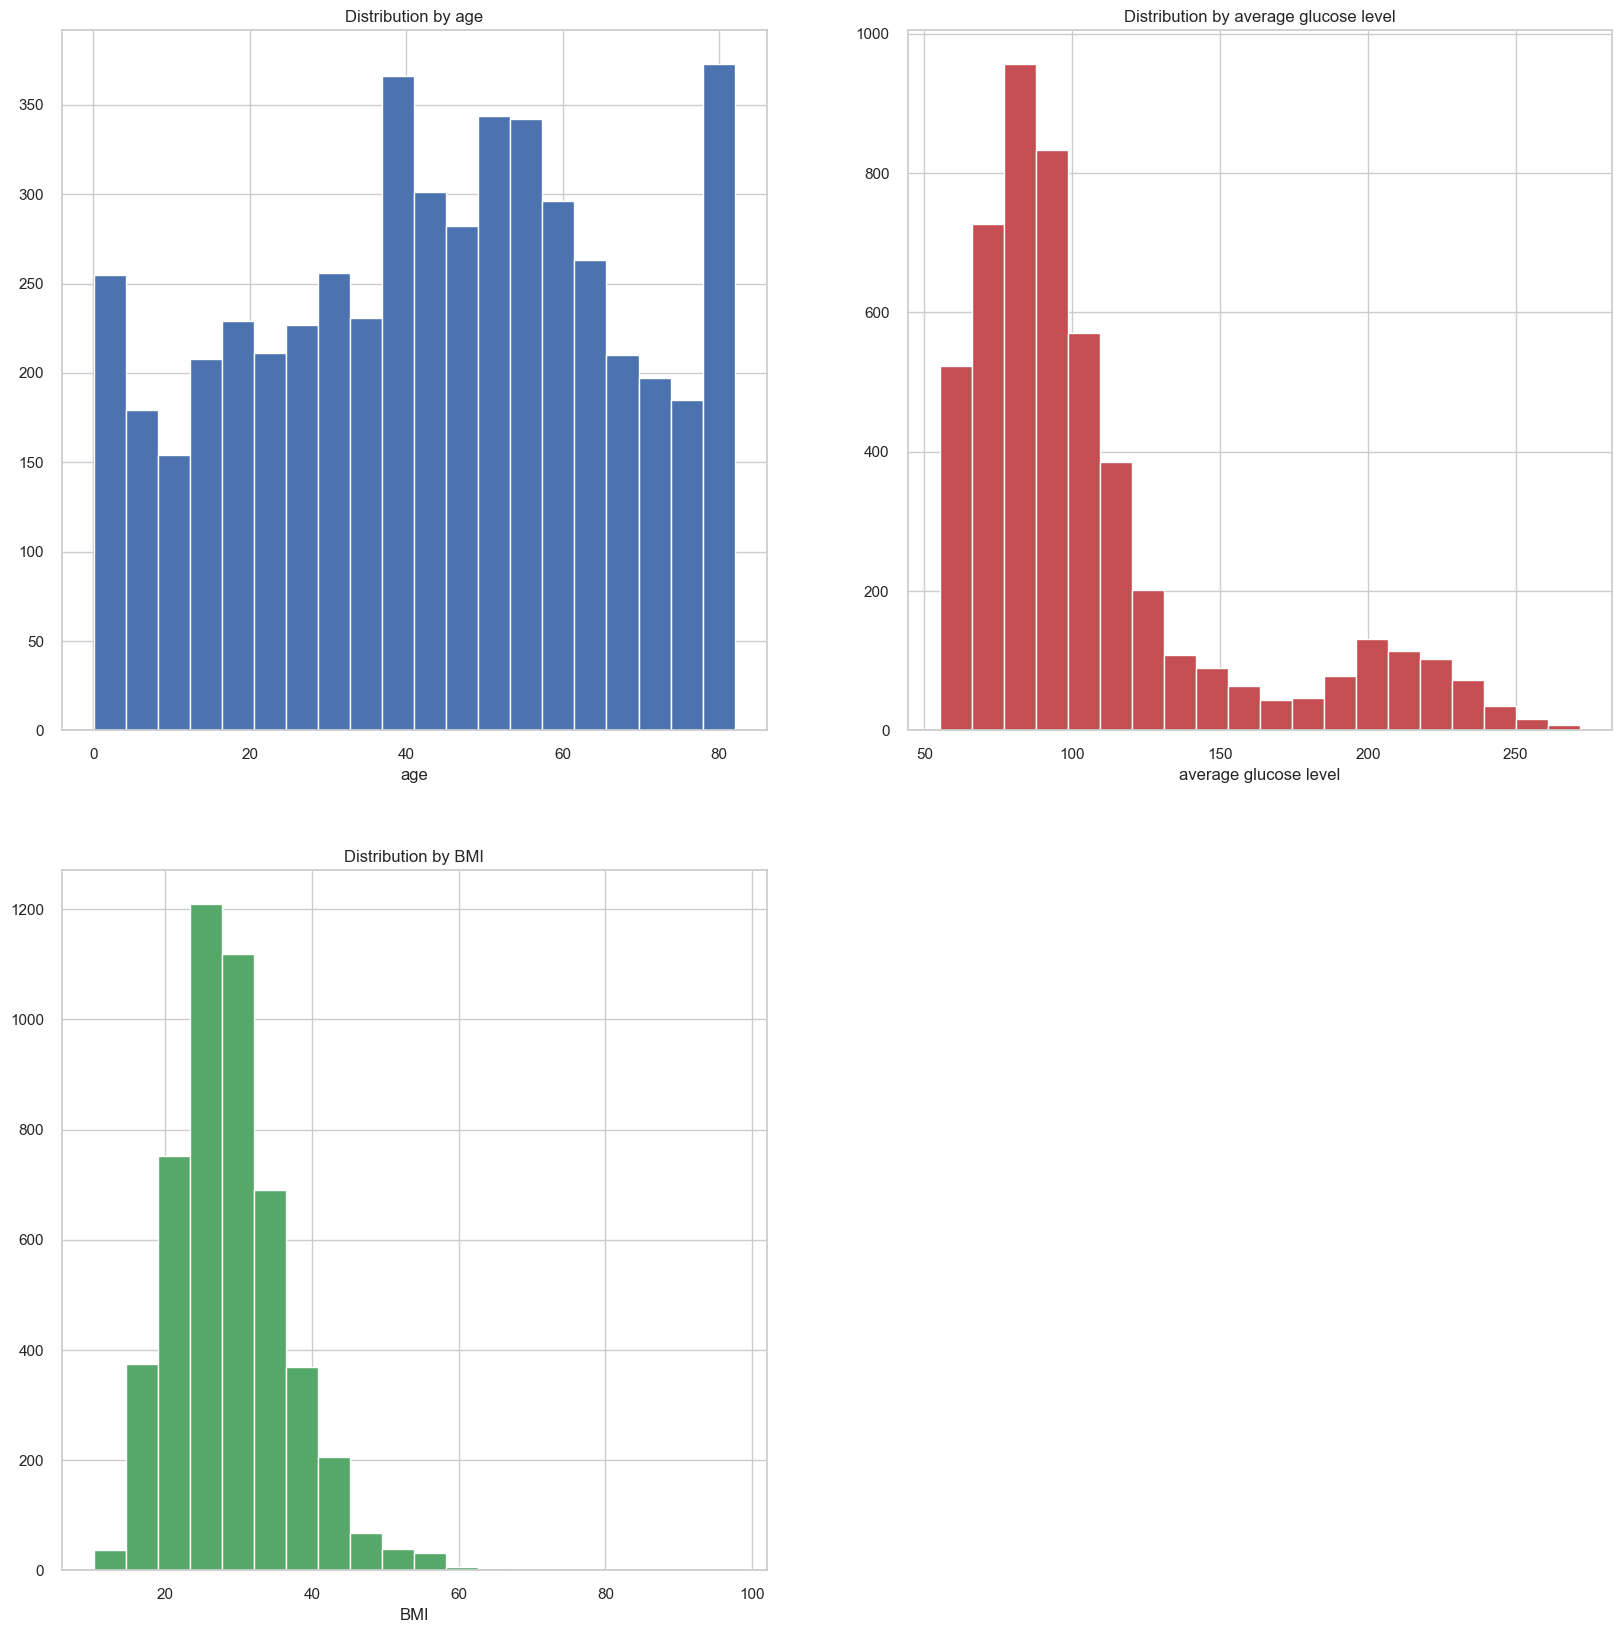

In [626]:
plt.figure(figsize=[20,20])
 
plt.subplot(221)
plt.hist(stroke['age'],bins=20,color='b')
plt.xlabel('age')
plt.title('Distribution by age')
 
plt.subplot(222)
plt.hist(stroke['avg_glucose_level'],bins=20,color='r')
plt.xlabel('average glucose level')
plt.title('Distribution by average glucose level')
 
plt.subplot(223)
plt.hist(stroke['bmi'],bins=20,color='g')
plt.xlabel('BMI')
plt.title('Distribution by BMI');


In [185]:
find_outliers(stroke, 1,1.5)
find_outliers(stroke, 7,1.5)
find_outliers(stroke, 8,1.5)


The number of lower outliers is:0,    The number of upper outliers is :0
The number of lower outliers is:0,    The number of upper outliers is :627
The number of lower outliers is:0,    The number of upper outliers is :110


In [186]:
stroke[stroke['bmi']>60]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
270,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
358,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
466,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
544,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
2764,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0
2840,Female,52.0,0,0,Yes,Private,Urban,98.27,61.2,Unknown,0
3825,Female,52.0,0,0,Yes,Private,Rural,118.46,61.6,smokes,0


After the examination of outliers, it was found that 13 persons have BMI higher than 60 which is extreme though realistic (the highest BMI ever recorded was 186 kg/m2 https://en.wikipedia.org/wiki/Jon_Brower_Minnoch). it was decided to not to remove them from the further analysis as they could contain meaningful information about the effects of BMI and average glucose levels on the probability of stroke.

#### Categorical variables:


The distributions of values of categorical variables are presented in the bar plots bellow. I can be seen that in the dataset there are more women than men, more persons ever married, much higher proportion of persons who work privately, almost equal proportions of urban and rural population, much higher proportions of persons who do not have hypertension and have not experienced a heart disease, a higher proportion of persons who never smoked than those who smoke or formerly smoked (quite a high proportion of persons missing information about their smoking status).

In [187]:
stroke['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

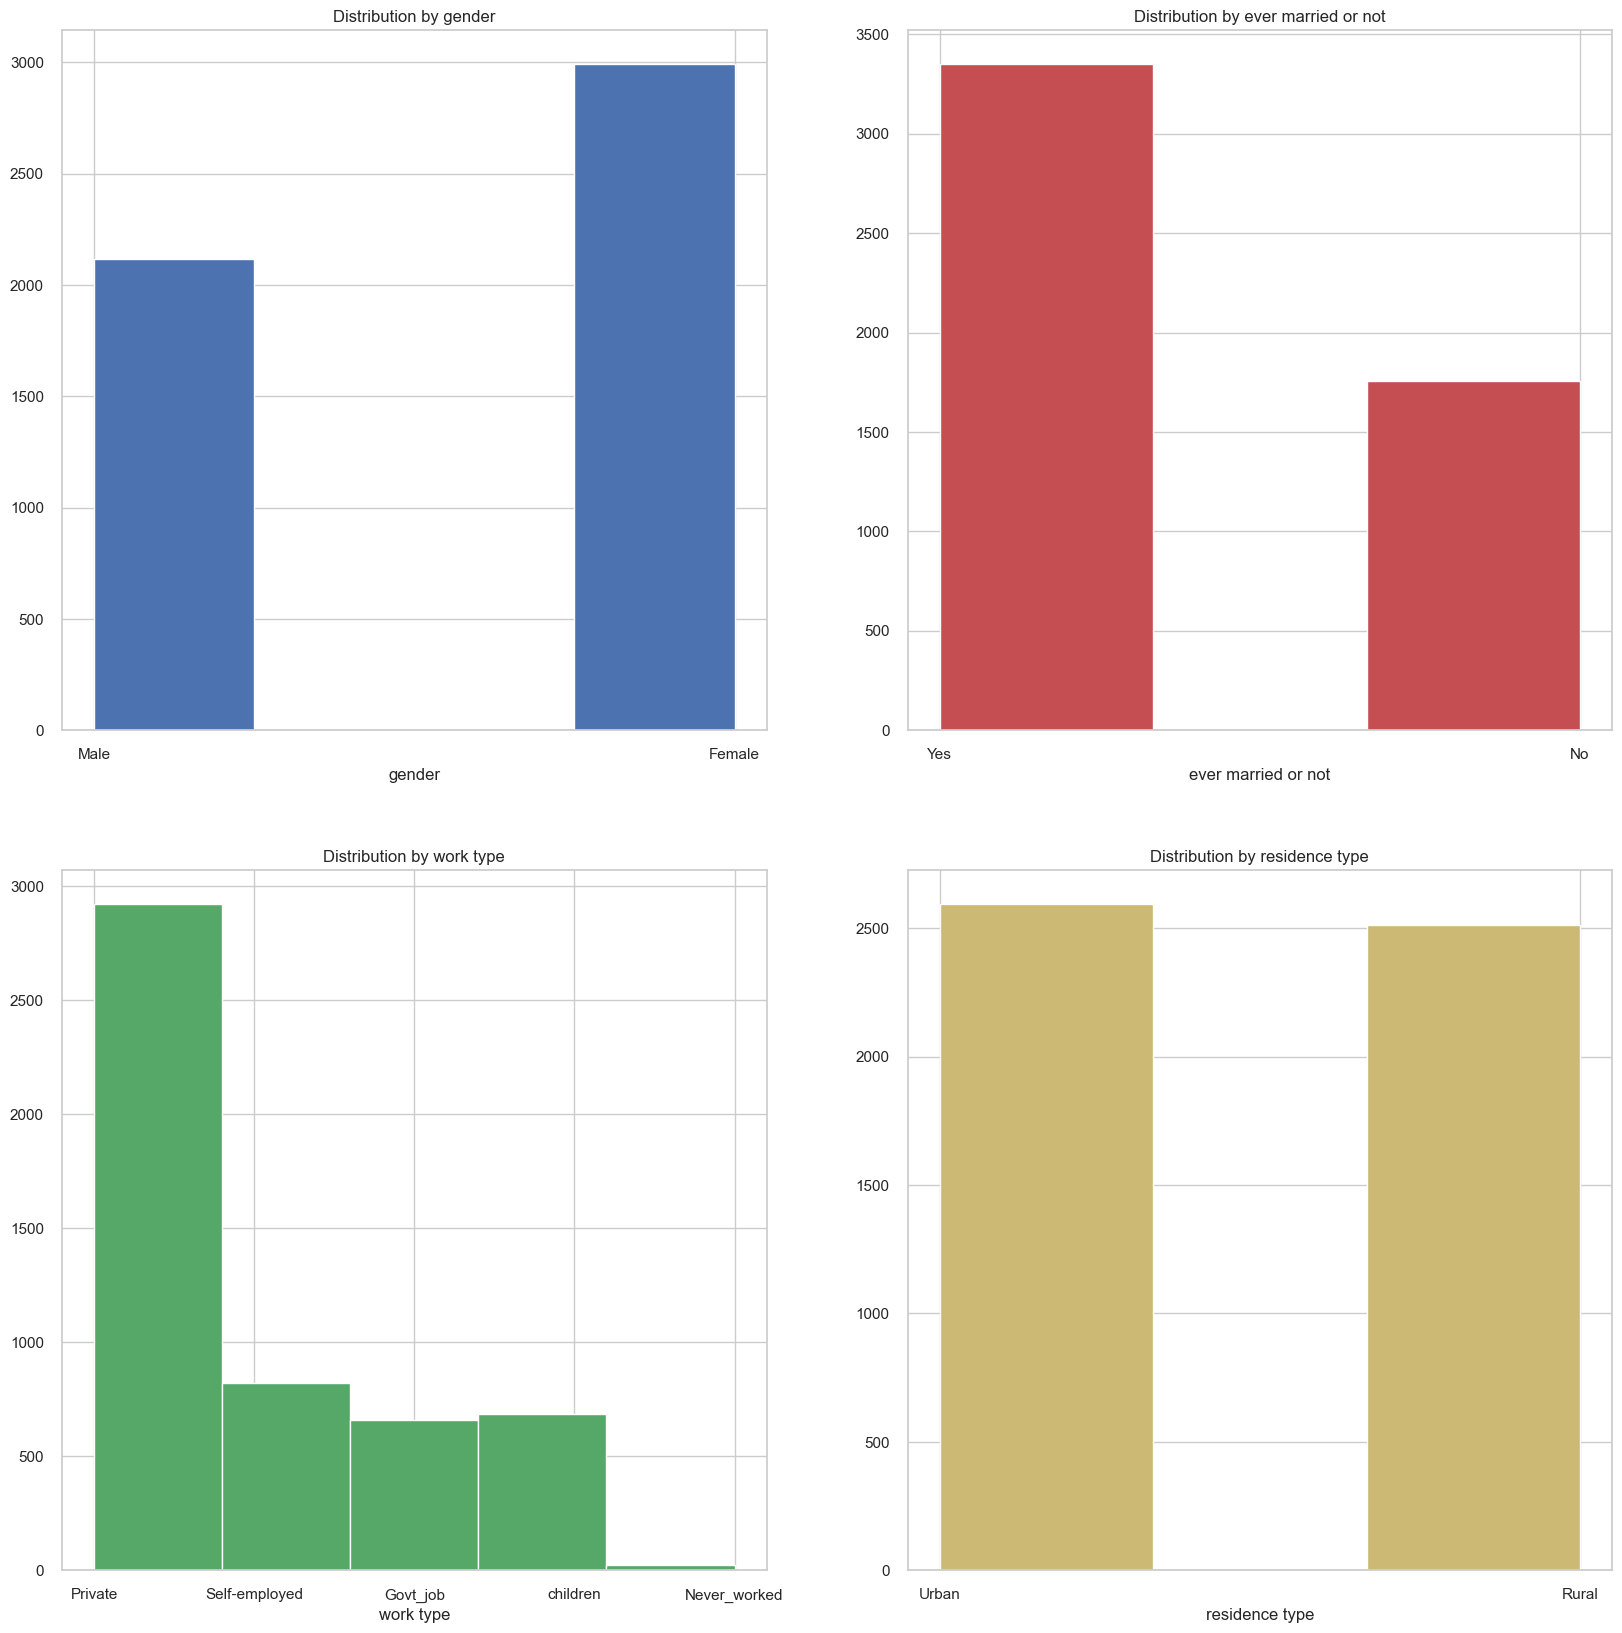

In [627]:
plt.figure(figsize=[20,20])
 
plt.subplot(221)
plt.hist(stroke['gender'],bins=4,color='b')
plt.xlabel('gender')
plt.title('Distribution by gender')
 
plt.subplot(222)
plt.hist(stroke['ever_married'],bins=3,color='r')
plt.xlabel('ever married or not')
plt.title('Distribution by ever married or not')
 
plt.subplot(223)
plt.hist(stroke['work_type'],bins=5,color='g')
plt.xlabel('work type')
plt.title('Distribution by work type')

plt.subplot(224)
plt.hist(stroke['Residence_type'],bins=3,color='y')
plt.xlabel('residence type')
plt.title('Distribution by residence type');


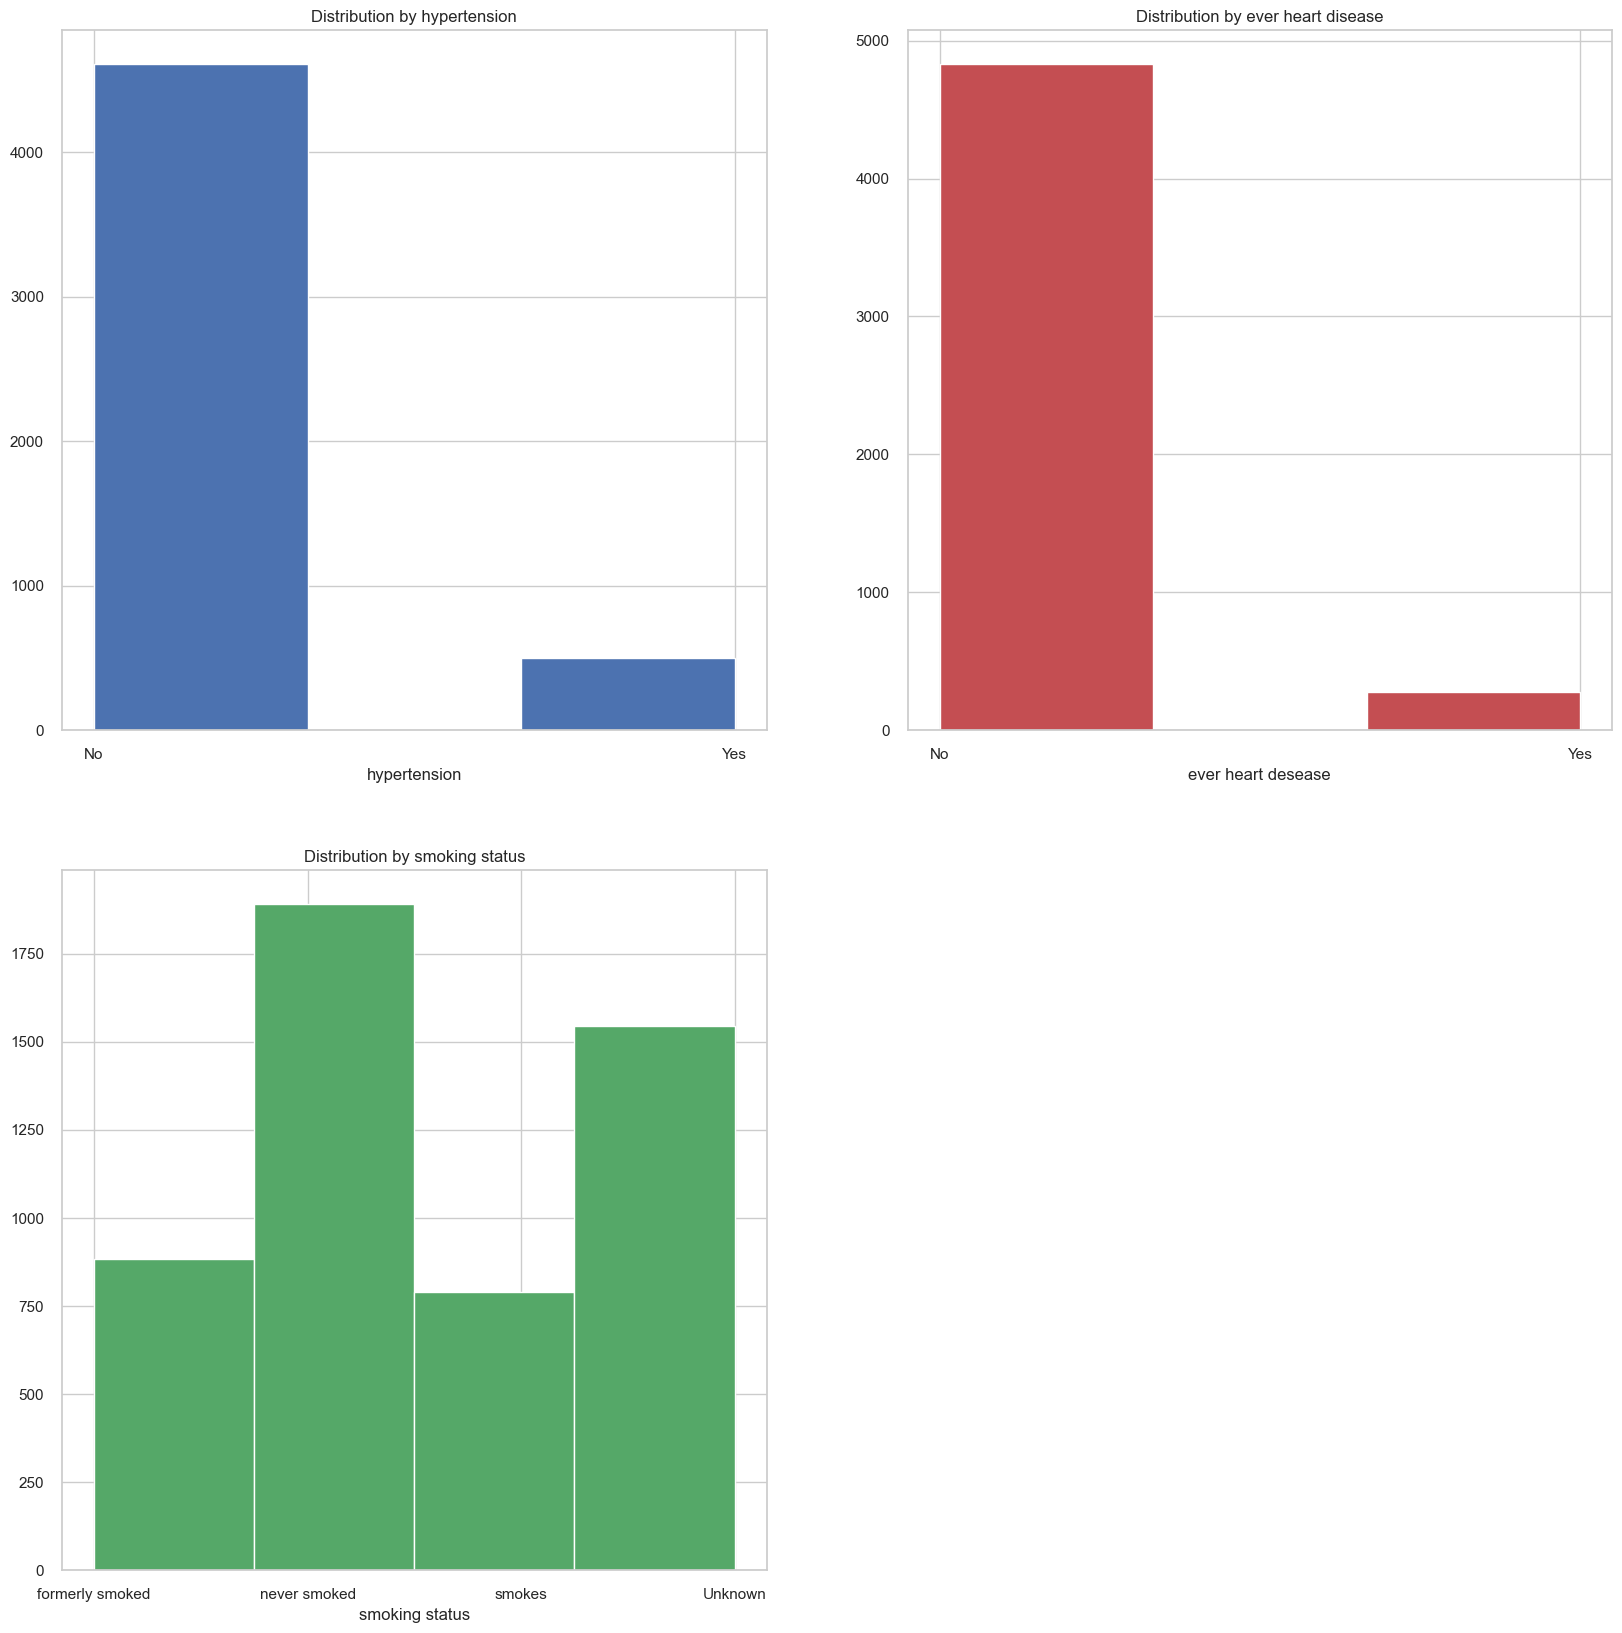

In [628]:
plt.figure(figsize=[20,20])

labels = {1: 'Yes', 0: 'No'}

plt.subplot(221)
plt.hist(stroke['hypertension'],bins=3,color='b')
plt.xlabel('hypertension')
plt.xticks([0, 1], [labels[0], labels[1]])
plt.title('Distribution by hypertension')
 
plt.subplot(222)
plt.hist(stroke['heart_disease'],bins=3,color='r')
plt.xlabel('ever heart desease')
plt.xticks([0, 1], [labels[0], labels[1]])
plt.title('Distribution by ever heart disease')

plt.subplot(223)
plt.hist(stroke['smoking_status'],bins=4,color='g')
plt.xlabel('smoking status')
plt.title('Distribution by smoking status');


A row with a value "Other" in the 'gender' variable was removed from the dataframe as it was the single one thus it cannot be used for prediction.

In [190]:
stroke = stroke[stroke.gender != "Other"]

#### 'Stroke' as a target variable:

It can be seen from the plot of the target variable, much higher proportion of persons in the dataset never experienced a stroke event. It also means that the dataset is imbalanced and additional means to remove the effect of the imbalance will be needed.

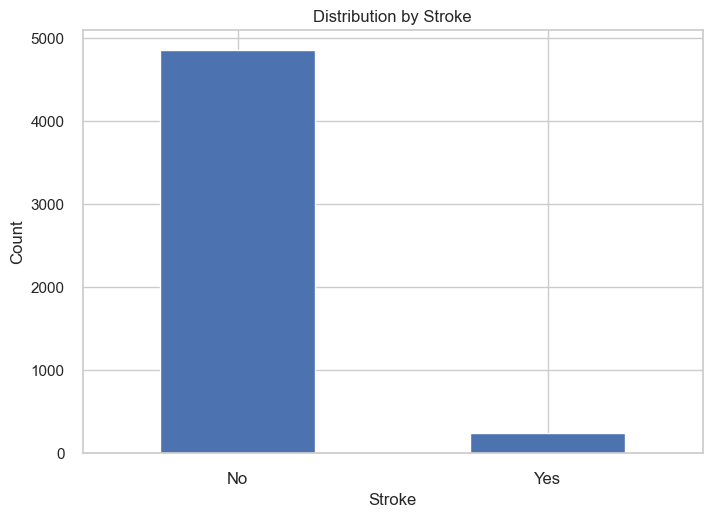

In [191]:
stroke["stroke"].value_counts().plot(kind="bar")
plt.title("Distribution by Stroke", fontsize = 12)
plt.xlabel("Stroke", fontsize = 12)
plt.xticks(rotation=0)
plt.ylabel("Count", fontsize = 12)
plt.xticks((0, 1), ('No', 'Yes'), fontsize = 12)
plt.show()

## 2. Examining relationships between variables: correlations and statistical inference


Next, relationships between various variables will be examined. It will be checked if the differences between customers who bought and customers who did not buy the travel insurance package are statistically significant. Also, correlations between numerical variables will be measured. 


#### Categorical variables:


In order to examine if there are statistically significant differences between persons who experienced a stroke event and who didn't with regard to categorical variables, Pearson chi square tests of association were performed by using the function presented bellow. The distributions of percentages are plotted in the stacked bars.

In [192]:
stroke_chi_square = stroke.drop(columns = ['age', 'avg_glucose_level','bmi'])


In [193]:
frames = {}
for i in range(0, (len(stroke_chi_square.columns)-1)):
    table = pd.crosstab(stroke_chi_square.loc[:,"stroke"],stroke_chi_square.iloc[:,i], dropna=False)
    table = (table/table.sum()*100).round(2)
    frames[i]=pd.DataFrame(table).transpose()
    frames[i].columns = ['No','Yes']


In [629]:
for i in range(0,len(frames)):
    print(frames[i])
    print('')

           No   Yes
gender             
Female  94.54  5.46
Male    93.73  6.27

                 No    Yes
hypertension              
0             95.41   4.59
1             86.10  13.90

                  No    Yes
heart_disease              
0              95.01   4.99
1              82.89  17.11

                 No   Yes
ever_married             
No            97.33  2.67
Yes           93.32  6.68

                   No   Yes
work_type                  
Govt_job        95.33  4.67
Never_worked   100.00  0.00
Private         94.75  5.25
Self-employed   91.40  8.60

                   No   Yes
Residence_type             
Rural           94.41  5.59
Urban           94.04  5.96

                    No   Yes
smoking_status              
formerly smoked  91.96  8.04
never smoked     95.10  4.90
smokes           94.66  5.34



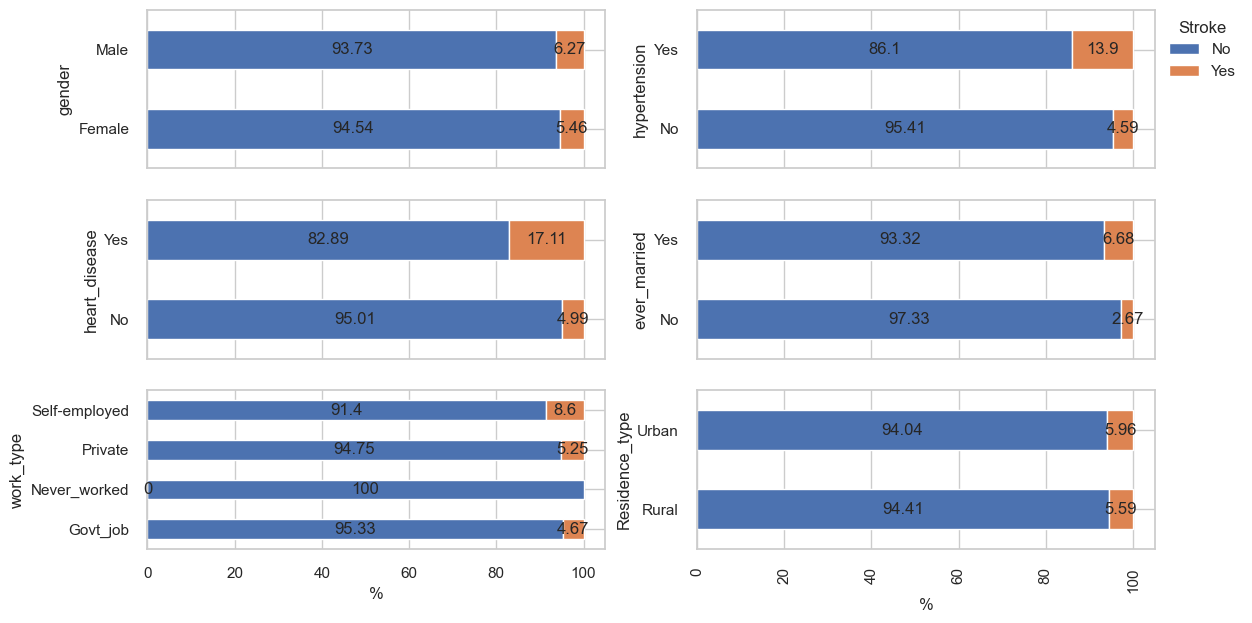

In [630]:
fig,((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3,ncols=2,sharex = True)

plt.xticks(rotation = "vertical")

frames[0].plot(ax=ax1,kind = "barh", stacked = True,figsize = (13,7),legend = False)
frames[1].plot(ax=ax2,kind = "barh", stacked = True,figsize = (13,7),legend = False)
frames[2].plot(ax=ax3,kind = "barh", stacked = True,figsize = (13,7), legend = False)
frames[3].plot(ax=ax4,kind = "barh", stacked = True,figsize = (13,7), legend = False)
frames[4].plot(ax=ax5,kind = "barh", stacked = True,figsize = (13,7), legend = False)
frames[5].plot(ax=ax6,kind = "barh", stacked = True,figsize = (13,7), legend = False)
ax2.legend(title='Stroke', bbox_to_anchor=(1, 1.02),
                     loc='upper left')      
for c in ax1.containers:
        ax1.bar_label(c, label_type='center')
for c in ax2.containers:
        ax2.bar_label(c, label_type='center')
for c in ax3.containers:
        ax3.bar_label(c, label_type='center')
for c in ax4.containers:
        ax4.bar_label(c, label_type='center')
for c in ax5.containers:
        ax5.bar_label(c, label_type='center')
for c in ax6.containers:
        ax6.bar_label(c, label_type='center')
ax2.set_yticks([0,1],["No","Yes"])
ax3.set_yticks([0,1],["No","Yes"])

ax5.set_xlabel("%")
ax6.set_xlabel("%");

Text(0.5, 0, '%')

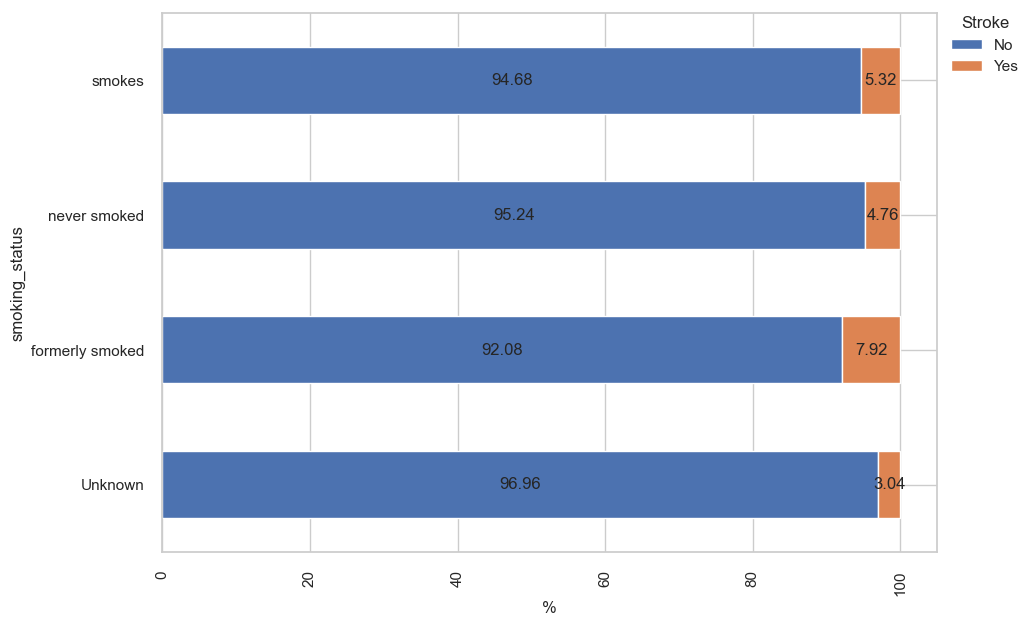

In [196]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,sharex = True)

plt.xticks(rotation = "vertical")

frames[6].plot(ax=ax1,kind = "barh", stacked = True,figsize = (10,7),legend = False)
ax1.legend(title='Stroke', bbox_to_anchor=(1, 1.02),
                     loc='upper left')      
for c in ax1.containers:
        ax1.bar_label(c, label_type='center')

ax1.set_xlabel("%")



In [197]:
inp = float(input("What is a confidence level (0,99, 0,95, or 0.9)?"))
significant = []
unsignificant = []
for i in range(0,len(frames)):
    p = chi_square_test(frames[i], inp, stroke_chi_square.columns[i])
    if p <= 1 - inp:
        print(f'With regard to the variable {stroke_chi_square.columns[i]}, \ngroups of persons \
who experienced a stroke \
and who didnt \nare dependent (reject H0).')
        significant.append(stroke_chi_square.columns[i])
    else:
        print(f'With regard to the variable {stroke_chi_square.columns[i]}, \ngroups of persons \
who experienced a stroke \
and who didnt \nare independent (H0 holds true).')
        unsignificant.append(stroke_chi_square.columns[i])
print('')
print(f'Significant statistical differences in groups of persons \
who experienced a stroke and who didnt \n\
are for these variables:\n\
{significant})')
print('')
print(f'Unsignificant statistical differences in groups of of persons \
who experienced a stroke and who didnt \n\
are for these variables:\n\
{unsignificant})')

What is a confidence level (0,99, 0,95, or 0.9)?0.95

Pearson chi square test:0.0

P_value: 1.0
With regard to the variable gender, 
groups of persons who experienced a stroke and who didnt 
are independent (H0 holds true).

Pearson chi square test:4.356

P_value: 0.037
With regard to the variable hypertension, 
groups of persons who experienced a stroke and who didnt 
are dependent (reject H0).

Pearson chi square test:7.406

P_value: 0.007
With regard to the variable heart_disease, 
groups of persons who experienced a stroke and who didnt 
are dependent (reject H0).

Pearson chi square test:1.942

P_value: 0.163
With regard to the variable ever_married, 
groups of persons who experienced a stroke and who didnt 
are independent (H0 holds true).

Pearson chi square test:13.293

P_value: 0.01
With regard to the variable work_type, 
groups of persons who experienced a stroke and who didnt 
are dependent (reject H0).

Pearson chi square test:0.0

P_value: 1.0
With regard to the variable R

It can be observed from the output of chi square tests that significant statistical differences in groups of persons who experienced a stroke and who didnt are for the variables 'hypertension', 'heart_disease' and 'work_type'.

As for quite a high proportion of persons information about their smoking status is unknown, it was decided to check if removing of the rows with the 'unknown' values would affect outputs of chi square tests. 

What concerns the variable "work_type", it is likely that the statistically significant effect of this variable on the probability of stroke was caused by the persons who are classified as children (they naturally experience less strokes due to their age) and persons who never worked (as there is very small number of such persons, all of them appeared not to have a stroke event). Thus, it was to decided to check the statistical significances by removing children and persons who never worked from the dataset.

In [198]:
stroke_chi_square = stroke_chi_square[stroke_chi_square.smoking_status != "Unknown"]
stroke_chi_square = stroke_chi_square[stroke_chi_square.work_type != "never_worked"]
stroke_chi_square = stroke_chi_square[stroke_chi_square.work_type != "children"]

In [199]:
frames = {}
for i in range(0, (len(stroke_chi_square.columns)-1)):
    table = pd.crosstab(stroke_chi_square.loc[:,"stroke"],stroke_chi_square.iloc[:,i], dropna=False)
    table = (table/table.sum()*100).round(2)
    frames[i]=pd.DataFrame(table).transpose()
    frames[i].columns = ['No','Yes']

In [624]:
inp = float(input("What is a confidence level (0,99, 0,95, or 0.9)?"))
significant = []
unsignificant = []
for i in range(0,len(frames)):
    p = chi_square_test(frames[i], inp, stroke_chi_square.columns[i])
    if p <= 1 - inp:
        print(f'With regard to the variable {stroke_chi_square.columns[i]}, \ngroups of persons \
who experienced a stroke \
and who didnt \nare dependent (reject H0).')
        significant.append(stroke_chi_square.columns[i])
    else:
        print(f'With regard to the variable {stroke_chi_square.columns[i]}, \ngroups of persons \
who experienced a stroke \
and who didnt \nare independent (H0 holds true).')
        unsignificant.append(stroke_chi_square.columns[i])
print('')
print(f'Significant statistical differences in groups of persons \
who experienced a stroke and who didnt \n\
are for these variables:\n\
{significant})')
print('')
print(f'Unsignificant statistical differences in groups of of persons \
who experienced a stroke and who didnt \n\
are for these variables:\n\
{unsignificant})')

What is a confidence level (0,99, 0,95, or 0.9)?0.99

Pearson chi square test:0.0

P_value: 1.0
With regard to the variable gender, 
groups of persons who experienced a stroke and who didnt 
are independent (H0 holds true).

Pearson chi square test:4.115

P_value: 0.042
With regard to the variable hypertension, 
groups of persons who experienced a stroke and who didnt 
are independent (H0 holds true).

Pearson chi square test:6.29

P_value: 0.012
With regard to the variable heart_disease, 
groups of persons who experienced a stroke and who didnt 
are independent (H0 holds true).

Pearson chi square test:1.017

P_value: 0.313
With regard to the variable ever_married, 
groups of persons who experienced a stroke and who didnt 
are independent (H0 holds true).

Pearson chi square test:8.512

P_value: 0.037
With regard to the variable work_type, 
groups of persons who experienced a stroke and who didnt 
are independent (H0 holds true).

Pearson chi square test:0.0

P_value: 1.0
With regard 

As it is seen the removing of these values did not affect the statistical significance of differences between other values of the variable 'smoking_status', thus it was decided to keep the rows with the 'unknown' smoking status in the dataset for further analysis.

It was also found that persons work type (either working in the government sector, private company or being self-employed) does not statistically impact the probability of stroke. 

Based on the user inputs of confidence levels (0.9, 0.95 or 0.99), it could be concluded that:
- hypertension has a statistically significant impact - out of those persons who experienced a stroke event 13.25 percent had a hypertension, 3.97 had not.
- hear disease has a statistically significant impact - out of those persons who experienced a stroke event 17 percent had a heart disease, 4.18 had not.

Other categorical variables do not statistically significant impact on the probability of stroke.

#### Numerical variables:

To check if there are statistically significant groups between persons whi experienced a stroke event and those who didn't with regard to numerical variables, t-tests of statistical signifficance as well as confidence intervals of differences between groups of persons were calculated.

In [201]:
stroke_t_test = stroke.loc[:,['age', 'avg_glucose_level','bmi','stroke']]
stroke_t_test.head()

,age,avg_glucose_level,bmi,stroke
0,67.0,228.69,36.6,1
1,61.0,202.21,NaN,1
2,80.0,105.92,32.5,1
3,49.0,171.23,34.4,1
4,79.0,174.12,24.0,1


##### Statistical significance test (t-test):

In [202]:
inp2 = float(input("What is the confidence level?:"))
significant = []
unsignificant = []
for inp1 in stroke_t_test.iloc[:,:3].columns.values:
    summary, results = rp.ttest(group1= stroke_t_test[inp1][stroke_t_test['stroke'] == 0], group1_name= "No",
         group2= stroke_t_test[inp1][stroke_t_test['stroke'] == 1], group2_name= "Yes")
    print(summary)
    print(results)
    print("")
    if results.iloc[3,1] < (1 - inp2):
        print(f'There is the statistically significant difference \n\
between means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        significant.append(inp1)
    else:
        print(f'There is no statistically significant difference \n\
between means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        unsignificant.append(inp1)
print('')
print(f'Significant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{significant})')
print('')
print(f'Unsignificant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{unsignificant})')

What is the confidence level?:0.95
   Variable       N       Mean         SD        SE  95% Conf.   Interval
0        No  4860.0  41.974831  22.293056  0.319780  41.347918  42.601745
1       Yes   249.0  67.728193  12.727419  0.806567  66.139597  69.316788
2  combined  5109.0  43.229986  22.613575  0.316374  42.609757  43.850216
          Independent t-test    results
0   Difference (No - Yes) =    -25.7534
1      Degrees of freedom =   5107.0000
2                       t =    -18.0776
3   Two side test p value =      0.0000
4  Difference < 0 p value =      0.0000
5  Difference > 0 p value =      1.0000
6               Cohen's d =     -1.1746
7               Hedge's g =     -1.1744
8          Glass's delta1 =     -1.1552
9        Point-Biserial r =     -0.2452

There is the statistically significant difference 
between means of age in groups of Yes and No.
   Variable       N        Mean         SD        SE   95% Conf.    Interval
0        No  4860.0  104.787584  43.847095  0.628960  

##### Confidence intervals for mean differences between groups:

The same result as in the calculation of t-tests was observed when confidence intervals for mean differences between groups of customers who bought the travel insurance package and who didn't were calculated. it was found that differences between groups of customers with regards of all three numerical variables are statistically significant.

In [625]:
inp2 = float(input("What is the confidence level?:"))
significant = []
unsignificant = []
for inp1 in stroke_t_test.iloc[:,:3].columns.values:
    summary, results = rp.ttest(group1= stroke_t_test[inp1][stroke_t_test['stroke'] == 0], group1_name= "No",
             group2= stroke_t_test[inp1][stroke_t_test['stroke']== 1], group2_name= "Yes")
    lower = ((summary.iloc[0,2] - summary.iloc[1,2])
    - stats.t.ppf((1+inp2)/2., summary.iloc[2,1]-1)
    * (math.sqrt((summary.iloc[0,4])**2/summary.iloc[0,1] + (summary.iloc[1,4])**2/summary.iloc[1,1])))

    upper = ((summary.iloc[0,2] - summary.iloc[1,2])
    + stats.t.ppf((1+inp2)/2., summary.iloc[2,1]-1)
    * (math.sqrt((summary.iloc[0,4])**2/summary.iloc[0,1] + (summary.iloc[1,4])**2/summary.iloc[1,1])))

    print(f'There is a {inp2*100} chance that the confidence interval of {lower.round(3), upper.round(3)} \
contains the true difference \nbetween means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
    print('')
    if (lower < 0 and upper < 0) or (lower > 0 and upper > 0):
        print(f'Since this interval does not contain the value “0” it means \n\
that it’s highly likely that there is a true difference between \n\
means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        print('')
        significant.append(inp1)
    else:
        print(f'Since this interval contains the value “0” it means that it’s unlikely \n\
that there is a true difference between \n\
means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        print('')
        unsignificant.append(inp1)
print('')
print(f'Significant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{significant})')
print('')
print(f'Unsignificant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{unsignificant})')


What is the confidence level?:0.99
There is a 99.0 chance that the confidence interval of (-25.886, -25.621) contains the true difference 
between means of age in groups of Yes and No.

Since this interval does not contain the value “0” it means 
that it’s highly likely that there is a true difference between 
means of age in groups of Yes and No.

There is a 99.0 chance that the confidence interval of (-28.398, -27.116) contains the true difference 
between means of avg_glucose_level in groups of Yes and No.

Since this interval does not contain the value “0” it means 
that it’s highly likely that there is a true difference between 
means of avg_glucose_level in groups of Yes and No.

There is a 99.0 chance that the confidence interval of (-1.725, -1.569) contains the true difference 
between means of bmi in groups of Yes and No.

Since this interval does not contain the value “0” it means 
that it’s highly likely that there is a true difference between 
means of bmi in groups of Yes 

Based on the user inputs of confidence levels (0.9, 0.95 or 0.99), it was found that for all signifficance levels:
- age variable has a statistically signifficant impact of the buying decision - older persons are more likely to experience a stroke event than younger persons ("Yes" - mean 67.7; No" - mean 41.9).
- average glucose level in blood has a statistically significant impact - persons with higher glucose level in blood are more likely to experience a stroke event than those who have lower level of glucose ("Yes" - mean 132.5; No" - mean 104.7).
- BMI has a statistically significant impact - persons who have the higher BMI (that is, who are overweight) are more likely to experience a stroke event than those who have the lower BMI ("Yes" - mean 30.47; No" - mean 28.8).

#### Correlations between numerical variables:


Next, it was examined if there are correlations between numerical variables. It was found that variables age, annual income and the number of family members are not correlated between each other.

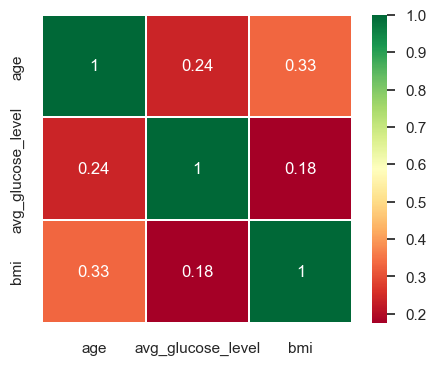

In [204]:
sns.heatmap(stroke_t_test.iloc[:,:-1].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(5,4)
plt.show()

## 3. Machine learning


In the third part of the analysis, machine learning models are built, trained and tested in order to find a model which best predicts the probability of stroke.

### Splitting training and testing data



First, the data were split into feature variables and target variable as well as into training and testing datasets. 75 percent of data were included into the training dataset, 25 percent into the testing dataset.

In [375]:
X = stroke.drop(['stroke'],axis=1)
y = stroke['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify = y)

### Building machine learning pipelines

Next, pipelines of transforming data were constructed. As for some categorical variables it was needed to encode them into numbers, one hot encoder function was applied. For numerical variables, standart scaler was applied to transform the variables into comparable scales.

In [376]:
numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
      ('binary', OneHotEncoder(handle_unknown='ignore')),
])

ordinal_transformer = Pipeline(steps=[
      ('ordinal', OrdinalEncoder())
])

In [377]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']
binary_features = ['gender', "ever_married", 'work_type',
                   'Residence_type', 'smoking_status']
ordinal_features = ['hypertension', "heart_disease"]

Preprocessor was created grouping pipelines transforming categorical and numerical variables. 

In [378]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('binary', binary_transformer, binary_features),
       ('ordinal', ordinal_transformer, ordinal_features)
]) 

Preprocessor was run outside the pipeline in order to set feature names in a transformed dataframe after one hot encoding.

In [379]:
X_pipe = pd.DataFrame(preprocessor.fit_transform(X))
X_pipe_train = pd.DataFrame(preprocessor.fit_transform(X_train))
X_pipe_test = pd.DataFrame(preprocessor.fit_transform(X_test))


In [380]:
preprocessor.get_feature_names_out()

array(['numeric__age', 'numeric__avg_glucose_level', 'numeric__bmi',
       'binary__gender_Female', 'binary__gender_Male',
       'binary__ever_married_No', 'binary__ever_married_Yes',
       'binary__work_type_Govt_job', 'binary__work_type_Never_worked',
       'binary__work_type_Private', 'binary__work_type_Self-employed',
       'binary__work_type_children', 'binary__Residence_type_Rural',
       'binary__Residence_type_Urban', 'binary__smoking_status_Unknown',
       'binary__smoking_status_formerly smoked',
       'binary__smoking_status_never smoked',
       'binary__smoking_status_smokes', 'ordinal__hypertension',
       'ordinal__heart_disease'], dtype=object)

In [381]:
X_pipe_train.columns = X_pipe_test.columns = X_pipe.columns = [
      'age', 'avg_glucose_level', 'bmi',
      'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 
       'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children','Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked',
       'smoking_status_never smoked',
       'smoking_status_smokes', 
        'hypertension','heart_disease']

In [382]:
X_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   avg_glucose_level               5109 non-null   float64
 2   bmi                             5109 non-null   float64
 3   gender_Female                   5109 non-null   float64
 4   gender_Male                     5109 non-null   float64
 5   ever_married_No                 5109 non-null   float64
 6   ever_married_Yes                5109 non-null   float64
 7   work_type_Govt_job              5109 non-null   float64
 8   work_type_Never_worked          5109 non-null   float64
 9   work_type_Private               5109 non-null   float64
 10  work_type_Self-employed         5109 non-null   float64
 11  work_type_children              5109 non-null   float64
 12  Residence_type_Rural            51

In [383]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_pipe_train, y_train)
rus = RandomUnderSampler(random_state=1)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

Various classifiers which will be used for modelling was combined into a list. The first list 'classifiers_full' included more classifiers. A second list included classifiers which will be used for hyperparameter tuning and feature selection.

In [384]:
classifiers_full = [
    
     NuSVC(gamma='auto')
    ,LinearSVC()
    ,SGDClassifier(max_iter=100, tol=1e-3)
    ,LogisticRegression(class_weight='balanced')
    ,BaggingClassifier()
    ,ExtraTreesClassifier(n_estimators=300)
    ,RandomForestClassifier()
    ,SVC(class_weight='balanced')
    ,KNeighborsClassifier()
    ,AdaBoostClassifier()
    ,GradientBoostingClassifier()
    ,xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
   ]

classifiers = [
    xg.XGBClassifier()
    ,RandomForestClassifier()
    ,ExtraTreesClassifier()
    ,GradientBoostingClassifier()
    ,LogisticRegression()
    ,SVC()
    ,KNeighborsClassifier()
    ,BaggingClassifier()
    ,AdaBoostClassifier()]


Functions for fitting the pipilines with different classifiers, for visualising them with classification reports and confusion matrixes as well as function for plotting bars which will be used for plotting accuracy scores of different classifiers were created.

In [606]:
def score_model(x_train, y_train, x_test, y_test, estimator, **kwargs):
    """
    Test various estimators.
    """
    pipeline = imbPipeline(steps = [
                   ('preprocessor', preprocessor),
                      ('smote', SMOTE()),
                   ('undersampler', RandomUnderSampler(random_state=1)),
                   ('classifier',classifier)
    ])
    
    model = pipeline.fit(x_train, y_train)
    prediction = model.predict(x_test)
    cross_val = cross_validate(
    pipeline, X_train, y_train, cv=5, scoring=("accuracy", "f1")
    )
    cross_vals.append(cross_val)
    models.append(model)
    print (estimator.__class__.__name__)
    conf = confusion_matrix(
        model, x_train, y_train, x_test, y_test, classes=['No', 'Yes'],
        cmap="YlGn", size=(200, 100), **kwargs
    )
    f1 = f1_score(y_test, prediction).round(3)
    prec = precision_score(y_test, prediction, average='macro').round(3)
    rec = recall_score(y_test, prediction).round(3)
    acc_sq = accuracy_score(y_test, prediction).round(3)
    print ("Precision score: {}".format(prec))
    print ("Recall score: {}".format(rec))
    print ("Accuracy score: {}".format(acc_sq))
    print("F1_score: {}".format(f1))
    print (f'Cross-validation')
    print ("Accuracy scores: {}".format(list(cross_val.values())[2]))
    print ("F1 scores: {}".format(list(cross_val.values())[3]))
    print('')
    scores["model_name"].append(f'{estimator.__class__.__name__}')
    scores["a_score"].append(acc_sq)
    scores["f1_score"].append(f1)
    scores["precision_score"].append(prec)
    scores["recall_score"].append(rec)

The function of running pipelines was run for each classfier in the longer list. Accuracy scores are presented in the output.

NuSVC


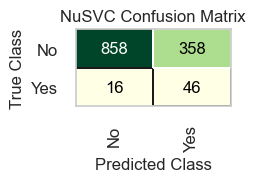

Accuracy score: 0.707
F1_score: 0.197
Cross-validation
Accuracy scores: [0.72881356 0.72715405 0.76240209 0.7232376  0.72193211]
F1 scores: [0.19379845 0.21722846 0.24793388 0.22058824 0.24199288]

LinearSVC


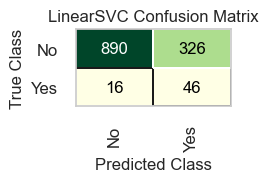

Accuracy score: 0.732
F1_score: 0.212
Cross-validation
Accuracy scores: [0.74315515 0.74543081 0.76240209 0.73759791 0.71932115]
F1 scores: [0.19591837 0.23529412 0.25409836 0.22988506 0.23487544]

SGDClassifier


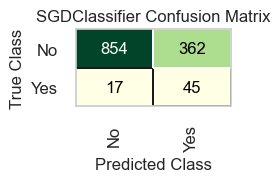

Accuracy score: 0.703
F1_score: 0.192
Cross-validation
Accuracy scores: [0.76140808 0.68146214 0.77154047 0.78067885 0.69190601]
F1 scores: [0.20779221 0.20261438 0.26160338 0.24324324 0.22875817]

LogisticRegression


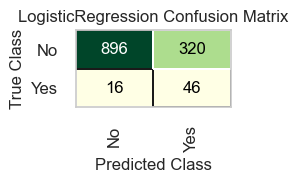

Accuracy score: 0.737
F1_score: 0.215
Cross-validation
Accuracy scores: [0.74576271 0.75587467 0.78067885 0.75195822 0.71671018]
F1 scores: [0.19087137 0.23673469 0.26956522 0.23387097 0.23321555]

BaggingClassifier


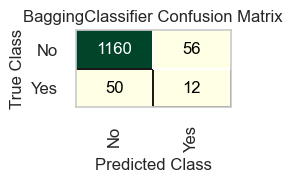

Accuracy score: 0.917
F1_score: 0.185
Cross-validation
Accuracy scores: [0.90482399 0.91383812 0.92036554 0.91775457 0.91644909]
F1 scores: [0.12048193 0.08333333 0.14084507 0.11267606 0.17948718]

ExtraTreesClassifier


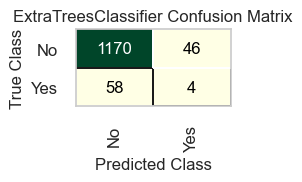

Accuracy score: 0.919
F1_score: 0.071
Cross-validation
Accuracy scores: [0.9243807  0.92558747 0.93211488 0.91906005 0.92167102]
F1 scores: [0.12121212 0.12307692 0.13333333 0.08823529 0.11764706]

RandomForestClassifier


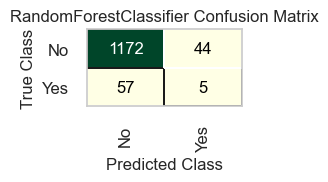

Accuracy score: 0.921
F1_score: 0.09
Cross-validation
Accuracy scores: [0.92959583 0.92819843 0.92819843 0.92819843 0.92950392]
F1 scores: [0.15625    0.06779661 0.09836066 0.12698413 0.12903226]

SVC


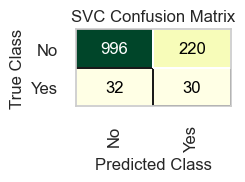

Accuracy score: 0.803
F1_score: 0.192
Cross-validation
Accuracy scores: [0.81877445 0.83159269 0.84856397 0.82767624 0.79373368]
F1 scores: [0.20571429 0.18867925 0.18309859 0.175      0.21      ]

KNeighborsClassifier


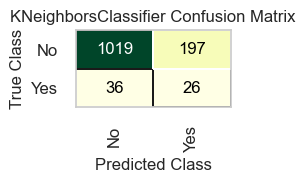

Accuracy score: 0.818
F1_score: 0.182
Cross-validation
Accuracy scores: [0.82268579 0.82767624 0.83159269 0.83550914 0.81331593]
F1 scores: [0.11688312 0.175      0.12244898 0.14864865 0.18285714]

AdaBoostClassifier


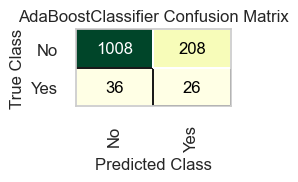

Accuracy score: 0.809
F1_score: 0.176
Cross-validation
Accuracy scores: [0.83181226 0.82506527 0.84986945 0.84203655 0.82114883]
F1 scores: [0.17834395 0.20238095 0.1958042  0.20915033 0.18934911]

GradientBoostingClassifier


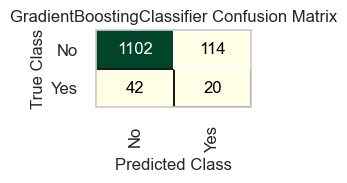

Accuracy score: 0.878
F1_score: 0.204
Cross-validation
Accuracy scores: [0.90612777 0.8772846  0.90339426 0.89686684 0.90078329]
F1 scores: [0.26530612 0.18965517 0.19565217 0.15053763 0.24      ]

XGBClassifier


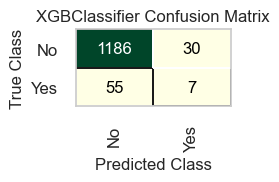

Accuracy score: 0.933
F1_score: 0.141
Cross-validation
Accuracy scores: [0.91655802 0.92428198 0.92819843 0.9229765  0.94125326]
F1 scores: [0.05882353 0.06451613 0.09836066 0.09230769 0.21052632]



In [607]:
cross_vals = []
models = []
scores = {}
scores["precision_score"] = []
scores["recall_score"] = []
scores["model_name"] = []
scores["a_score"] = []
scores["f1_score"] = []
for classifier in classifiers_full:
    score_model(X_train, y_train, X_test, y_test, classifier)

In [610]:
scores = pd.DataFrame(scores)
scores = scores.set_index('model_name')
scores

,precision_score,recall_score,a_score,f1_score
model_name,,,,
NuSVC,0.548,0.742,0.707,0.197
LinearSVC,0.553,0.742,0.732,0.212
SGDClassifier,0.546,0.726,0.703,0.192
LogisticRegression,0.554,0.742,0.737,0.215
BaggingClassifier,0.568,0.194,0.917,0.185
ExtraTreesClassifier,0.516,0.065,0.919,0.071
RandomForestClassifier,0.528,0.081,0.921,0.090
SVC,0.544,0.484,0.803,0.192
KNeighborsClassifier,0.541,0.419,0.818,0.182


In [387]:
for model in models:
    joblib.dump(model, f'model{models.index(model)}.pkl')

In [583]:
scores = pd.DataFrame(scores).set_index("model_name")
scores.to_csv('scores_stroke.csv')

In [584]:
scores = pd.DataFrame(scores).sort_values("a_score", ascending = False)

The following plot present accuracy scores of all classifiers. It can be observed that the highest accuracy score is generated by the XGBoost classifier (0.93).

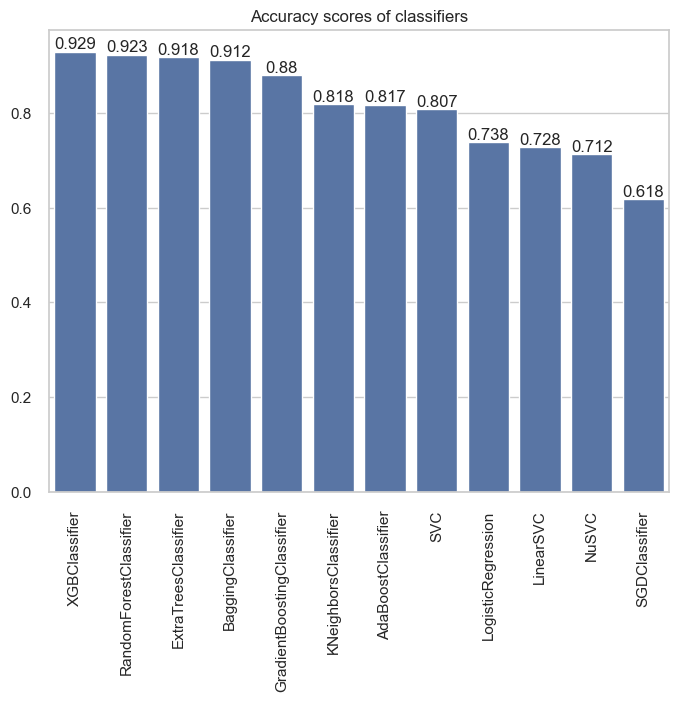

In [390]:
plot_bars(scores, "a_score", "", "Accuracy scores of classifiers")

### Hyperparameter tuning

In this section results of hyperparameter tuning for selected classifiers will be presented. Three strategies will be applied for hyperparameter tuning - random search and search based on the algorithm implemented in the optuna library. 

First, parameters of selected classifiers were examined. 

In [232]:
for classifier in classifiers:
    print(classifier)
    print(classifier.get_params())
    print('')


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': 

The parameters were set for the selected classifiers in the list (see bellow). A limited list of parameters was selected due to the time limitations.

In [233]:
params = [  
        {'classifier__n_estimators' : [100, 500, 1000],
        'classifier__max_depth' : [3, 6, 9],
        'classifier__learning_rate' : [0.01, 0.1, 0.3],
        'classifier__subsample' : [0.6, 0.8, 1.0]
       # 'classifier__colsample_bytree' : [0.6, 0.8, 1.0],
       # 'classifier__gamma' : [0, 0.1, 0.3],
       # 'classifier__min_child_weight' : [1, 3, 5],
       # 'classifier__reg_alpha' : [0, 0.1, 1.0],
       # 'classifier__reg_lambda' : [0, 0.1, 1.0],
       # 'classifier__scale_pos_weight' : [1, 2, 5]
        },

        {'classifier__n_estimators' : [100, 300, 500],
        'classifier__max_depth' : [None, 5, 10],
      #  'classifier__min_samples_split' : [2, 5, 10],
      #  'classifier__min_samples_leaf' : [1, 2, 4],
        'classifier__max_features' : ['auto', 'sqrt', 'log2']
      #  'classifier__bootstrap' : [True, False]
        },

        {'classifier__n_estimators' : [100, 300, 500],
        'classifier__max_depth' : [None, 5, 10],
       # 'classifier__min_samples_split' : [2, 5, 10],
       # 'classifier__min_samples_leaf' : [1, 2, 4],
        'classifier__max_features' : ['auto', 'sqrt', 'log2']
       # 'classifier__bootstrap' : [True, False]
        },

        {'classifier__n_estimators' : [100, 300, 500],
        'classifier__learning_rate' : [0.01, 0.1, 0.3],
        'classifier__max_depth' : [3, 5, 7],
       # 'classifier__min_samples_split' : [2, 5, 10],
       # 'classifier__min_samples_leaf' : [1, 2, 4],
        'classifier__max_features' : ['auto', 'sqrt', 'log2']},

        {'classifier__C' : [0.1, 1.0, 10.0],
        'classifier__penalty' : ['l1', 'l2'],
        'classifier__solver' : ['liblinear', 'saga']},

        {'classifier__C' : [0.1, 1.0, 10.0],
        'classifier__kernel' : ['linear', 'rbf', 'sigmoid'],
        'classifier__gamma' : ['scale', 'auto']},

        {'classifier__n_neighbors' : [3, 5, 7],
        'classifier__weights' : ['uniform', 'distance'],
       # 'classifier__algorithm' : ['auto', 'ball_tree', 'kd_tree'],
        'classifier__leaf_size' : [30, 60, 90]},

        {'classifier__n_estimators' : [10, 50, 100],
        'classifier__max_samples' : [0.5, 0.8, 1.0],
        'classifier__max_features' : [0.5, 0.8, 1.0]
      #  'classifier__bootstrap' : [True, False]
        },

        {'classifier__n_estimators' : [50, 100, 200],
        'classifier__learning_rate' : [0.01, 0.1, 1.0]}]

#### Randomized search:

Hyperparameter tuning based on the random search strategy was performed. After running the pipeline on classifiers in the list, models with the best parameters, generating the highest accuracy scores, were selected (see bellow).



In [234]:
scores_rand = {}
scores_rand["model_name"] = []
scores_rand["a_score"] = []
scores_rand["f1_score"] = []
scores_rand["predictions"] = []
scores_rand['models'] = []

for classifier in classifiers:
   
    pipeline = imbPipeline(steps = [
                   ('preprocessor', preprocessor),
                   ('smote', SMOTE()),
                   ('undersampler', RandomUnderSampler(random_state=1)),
                   ('classifier',classifier)
    ])
 
    random_rf = RandomizedSearchCV(pipeline, params[classifiers.index(classifier)], n_iter=10, 
                                   scoring='accuracy', cv=5, refit=True)
    random_rf.fit(X_train, y_train)
    prediction = random_rf.best_estimator_.predict(X_test)
    print (classifier.__class__.__name__)
    f1 = f1_score(y_test, prediction).round(3)
    print("{} F1_score: {}".format(classifier.__class__.__name__, f1))
    acc_sq = accuracy_score(y_test, prediction).round(3)
    print (f'Model accuracy score: {acc_sq}')
    print (f'Best parameters of the model:{random_rf.best_params_}')
    print('')
    scores_rand["model_name"].append(f'{classifier.__class__.__name__}')
    scores_rand["a_score"].append(acc_sq)
    scores_rand["f1_score"].append(f1)
    scores_rand["predictions"].append(prediction)
    scores_rand["models"].append(random_rf)

XGBClassifier
XGBClassifier F1_score: 0.121
Model accuracy score: 0.932
Best parameters of the model:{'classifier__subsample': 1.0, 'classifier__n_estimators': 500, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.3}

RandomForestClassifier
RandomForestClassifier F1_score: 0.108
Model accuracy score: 0.923
Best parameters of the model:{'classifier__n_estimators': 300, 'classifier__max_features': 'log2', 'classifier__max_depth': None}

ExtraTreesClassifier
ExtraTreesClassifier F1_score: 0.066
Model accuracy score: 0.912
Best parameters of the model:{'classifier__n_estimators': 100, 'classifier__max_features': 'log2', 'classifier__max_depth': None}

GradientBoostingClassifier
GradientBoostingClassifier F1_score: 0.136
Model accuracy score: 0.93
Best parameters of the model:{'classifier__n_estimators': 300, 'classifier__max_features': 'auto', 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}

LogisticRegression
LogisticRegression F1_score: 0.215
Model accuracy score:

It can be seen that accuracy scores of all classifiers were slightly improved comparing with the scores of the same classifiers with the default parameters. 

#### Optuna solution:

In order to apply the algorithm of the hyperparameter tuning impemented by the Optuna library, the function 'objective' with classifiers' parameters, model fitting and predicting was created.

In [235]:
def objective(trial):
     
    classifier_name = trial.suggest_categorical("classifier", ["XgBoost", "ExtremeTrees", "LogisticRegression","SVC", 
                                                               "RandomForest", "GradientBoosting",
                                                               "KNeighborsClassifier"])
    
    if classifier_name == "XgBoost":
        n_estimators = trial.suggest_int("n_estimators", 10,1001, step = 100)
        max_depth = trial.suggest_int('max_depth', 3, 9, step = 3)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, step = 0.1)
        subsample = trial.suggest_float('subsample', 0.6, 1, step = 0.2)
        classifier_obj = xg.XGBClassifier(n_estimators = n_estimators, max_depth = max_depth,
                                           learning_rate = learning_rate, subsample = subsample)
        classifier_obj.fit(X_train_resampled, y_train_resampled)
   
    elif classifier_name == "ExtremeTrees":
        n_estimators = trial.suggest_int("n_estimators", 100,500, step = 200)
        max_depth = trial.suggest_int('max_depth',0, 10, step = 5)
        max_features = trial.suggest_categorical("max_features", ['auto','sqrt','log2'])
        classifier_obj = ExtraTreesClassifier(n_estimators = n_estimators, max_depth = max_depth,
                                           max_features = max_features)
        classifier_obj.fit(X_train_resampled, y_train_resampled)
        
    elif classifier_name == "LogisticRegression":
        lg_penalty = trial.suggest_categorical("lg_penalty", ['l1', 'l2'])
        lg_c = trial.suggest_float('C', 0.1, 10.0)
        classifier_obj = LogisticRegression(penalty = lg_penalty, C=lg_c, solver="liblinear")
        classifier_obj.fit(X_train_resampled, y_train_resampled)
        
    elif classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 0.1, 1000, log =True)
        gamma = trial.suggest_float("gamma", 0.1, 1000, log=True)
        classifier_obj = SVC(class_weight = "balanced", C=svc_c, gamma=gamma, kernel='rbf')
        classifier_obj.fit(X_train_resampled, y_train_resampled)
        
    elif classifier_name == "RandomForest":
        max_features = trial.suggest_int("max_features", 6,32, step = 5)
        n_estimators = trial.suggest_int("n_estimators", 10,101, step = 10)
        max_depth = trial.suggest_int("rf_max_depth", 2, 64, log=True)
        max_samples = trial.suggest_float("max_samples",0.2, 1)
        classifier_obj = RandomForestClassifier(
            max_depth = max_depth,
            max_features = max_features,
            n_estimators = n_estimators,
            max_samples = max_samples,
            random_state = 42)
        classifier_obj.fit(X_train_resampled, y_train_resampled)
        
    elif classifier_name == "GradientBoosting":
        max_features_gr = trial.suggest_int("max_features_gr", 6,32, step = 5)
        n_estimators_gr = trial.suggest_int("n_estimators_gr", 10,101, step = 10)
        max_depth_gr = trial.suggest_int("rf_max_depth_gr", 2, 64, log=True)
        classifier_obj = GradientBoostingClassifier(
            max_depth = max_depth_gr,
            max_features = max_features_gr,
            n_estimators = n_estimators_gr,
            random_state = 42)
        classifier_obj.fit(X_train_resampled, y_train_resampled)
        
    else:
        n_neighbors = trial.suggest_int("n_neighbors", 3,13, step = 2)
        weights = trial.suggest_categorical("weights",['uniform', 'distance'])
        p = trial.suggest_int("p",1,2)
        classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p = p)
        classifier_obj.fit(X_train_resampled, y_train_resampled)
    
    y_pred = classifier_obj.predict(X_pipe_test)
    score = accuracy_score(y_test, y_pred)

    return score

The function was run with the maximization direction for 100 trials and the trial with the best accuracy score was presented. It appeared that the optuna solution was able to suggest the combination of parameters for the support vector machine (SVC) classifier which generated the highest accuracy score (0.9514) comparing to all other approaches.

In [236]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

Best Score:  0.9514866979655712
Best Params: 
  classifier: SVC
  svc_c: 367.1713754144351
  gamma: 463.5630699042702


However, when the parameters were specified directly in the "score_models" function, the accuracy scores were lower (similar to the initial scores with the default parameters).

### Feature engineering

In this section feature selection approaches are presented. One approach is random search of features which is implemented by the function 'find_inputs'. Random combinations of features are selected from the list of features and classification models are fitted on these combinations, predictions are generated for a number of times (e.g. 5000). Unique combinations and accuracy scores are saved in a dictionary and then the combination with the highest accuracy score is selected. However, this approach is very time-consuming, thus, it was possible to apply this function only for the logistic regression classifier.

#### Random feature selection:

In [363]:
def find_inputs(model, x_data, y_data, x_test_data, y_test_data, list_length): 
    data = {}
    var_list = [0 + i * 1 for i in range(list_length)]
    i_list = [[]]
    u = 0
    while u < 5000:
        i = random.choices(var_list[:-1], k=random.choice(var_list[1:]))
        i = list(np.unique(i))
        x = x_data.iloc[:,i]
        mod = model.fit(x, y_data)
        prediction = mod.predict(x_test_data.iloc[:,i])
        acc_sq = accuracy_score(y_test_data, prediction)
        if i not in i_list:
            data[f"{i}"] = acc_sq.round(3)
            i_list.append(i)
        u+=1
    
    print('Combinations of independent variables for the model with the highest accuracy scores:')
    print(f'{max(data, key=data.get)}')
    print('Accuracy score:') 
    print(data[f'{max(data, key=data.get)}'])
    return data

In [364]:
data = find_inputs(LogisticRegression(), X_train_resampled, y_train_resampled, X_pipe_test, y_test, 18)

Combinations of independent variables for the model with the highest accuracy scores:
[10]
Accuracy score:
0.817


In [365]:
res = dict(sorted(data.items(), key = lambda x: x[1], reverse = True)[:20])
 
print(f"Top 10 combinations of independent variables and coeficients of determination: \n{res}")

Top 10 combinations of independent variables and coeficients of determination: 
{'[10]': 0.817, '[7, 10]': 0.817, '[3, 10]': 0.817, '[10, 16]': 0.817, '[3, 4, 10]': 0.817, '[3, 4, 7, 10]': 0.817, '[4, 10]': 0.817, '[3, 7, 10]': 0.817, '[4, 8, 10]': 0.817, '[8, 10]': 0.817, '[4, 7, 10]': 0.817, '[3, 15]': 0.809, '[7, 15]': 0.809, '[4, 15]': 0.809, '[8, 15]': 0.809, '[7, 8, 15]': 0.809, '[15]': 0.809, '[3, 15, 16]': 0.809, '[4, 7, 8, 15]': 0.809, '[13, 15]': 0.809}


In order to test how the combination of features which generates the highest accuracy score for the logistic regression classifier suits to other classifiers, the combination of features was selected and models were run for the full list of classifiers.

In [368]:
X_train_resampled_e = X_train_resampled.iloc[:,[3,4,7,10]]
X_pipe_test_e = X_pipe_test.iloc[:,[3,4,7,10]]

In [371]:
X_pipe_test_e

,gender_Female,gender_Male,work_type_Govt_job,work_type_Self-employed
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
1273,0.0,1.0,0.0,1.0
1274,0.0,1.0,0.0,0.0
1275,0.0,1.0,1.0,0.0
1276,1.0,0.0,0.0,0.0


In [373]:
models_rfeatures = []
scores_rfeatures = {}
scores_rfeatures["model_name"] = []
scores_rfeatures["a_score"] = []
scores_rfeatures["f1_score"] = []
scores_rfeatures["predictions"] = []

for classifier in classifiers_full:
    model_rfeatures = classifier.fit(X_train_resampled_e, y_train_resampled)
    prediction = model_rfeatures.predict(X_pipe_test_e)
    print (classifier.__class__.__name__)
    f1 = f1_score(y_test, prediction).round(3)
    print("{} F1_score: {}".format(classifier.__class__.__name__, f1))
    acc_sq = accuracy_score(y_test, prediction).round(3)
    print (f'Model accuracy score: {acc_sq}')
    print('')
    models_rfeatures.append(model_rfeatures)
    scores_rfeatures["model_name"].append(f'{classifier.__class__.__name__}')
    scores_rfeatures["a_score"].append(acc_sq)
    scores_rfeatures["f1_score"].append(f1)
    scores_rfeatures["predictions"].append(prediction)

NuSVC
NuSVC F1_score: 0.117
Model accuracy score: 0.538

LinearSVC
LinearSVC F1_score: 0.146
Model accuracy score: 0.817

SGDClassifier
SGDClassifier F1_score: 0.146
Model accuracy score: 0.817

LogisticRegression
LogisticRegression F1_score: 0.146
Model accuracy score: 0.817

BaggingClassifier
BaggingClassifier F1_score: 0.0
Model accuracy score: 0.951

ExtraTreesClassifier
ExtraTreesClassifier F1_score: 0.0
Model accuracy score: 0.951

RandomForestClassifier
RandomForestClassifier F1_score: 0.0
Model accuracy score: 0.951

SVC
SVC F1_score: 0.0
Model accuracy score: 0.951

KNeighborsClassifier
KNeighborsClassifier F1_score: 0.0
Model accuracy score: 0.951

AdaBoostClassifier
AdaBoostClassifier F1_score: 0.0
Model accuracy score: 0.951

GradientBoostingClassifier
GradientBoostingClassifier F1_score: 0.0
Model accuracy score: 0.951

XGBClassifier
XGBClassifier F1_score: 0.0
Model accuracy score: 0.951



It was found that the combination of these feature variables (both gender variables and two work type variables) generates better accuracy scores for all classifiers comparing to the full list of feature variables, however, it does not seem meaningful taking into account that it had been earlier found that neither gender nor work type had a statistically significant impact on the probability of stroke.

#### Selection based on feature importances:

The next approach for feature selection was based on the identification of the most important features. Plots for feature importances of different classifiers are presented bellow.

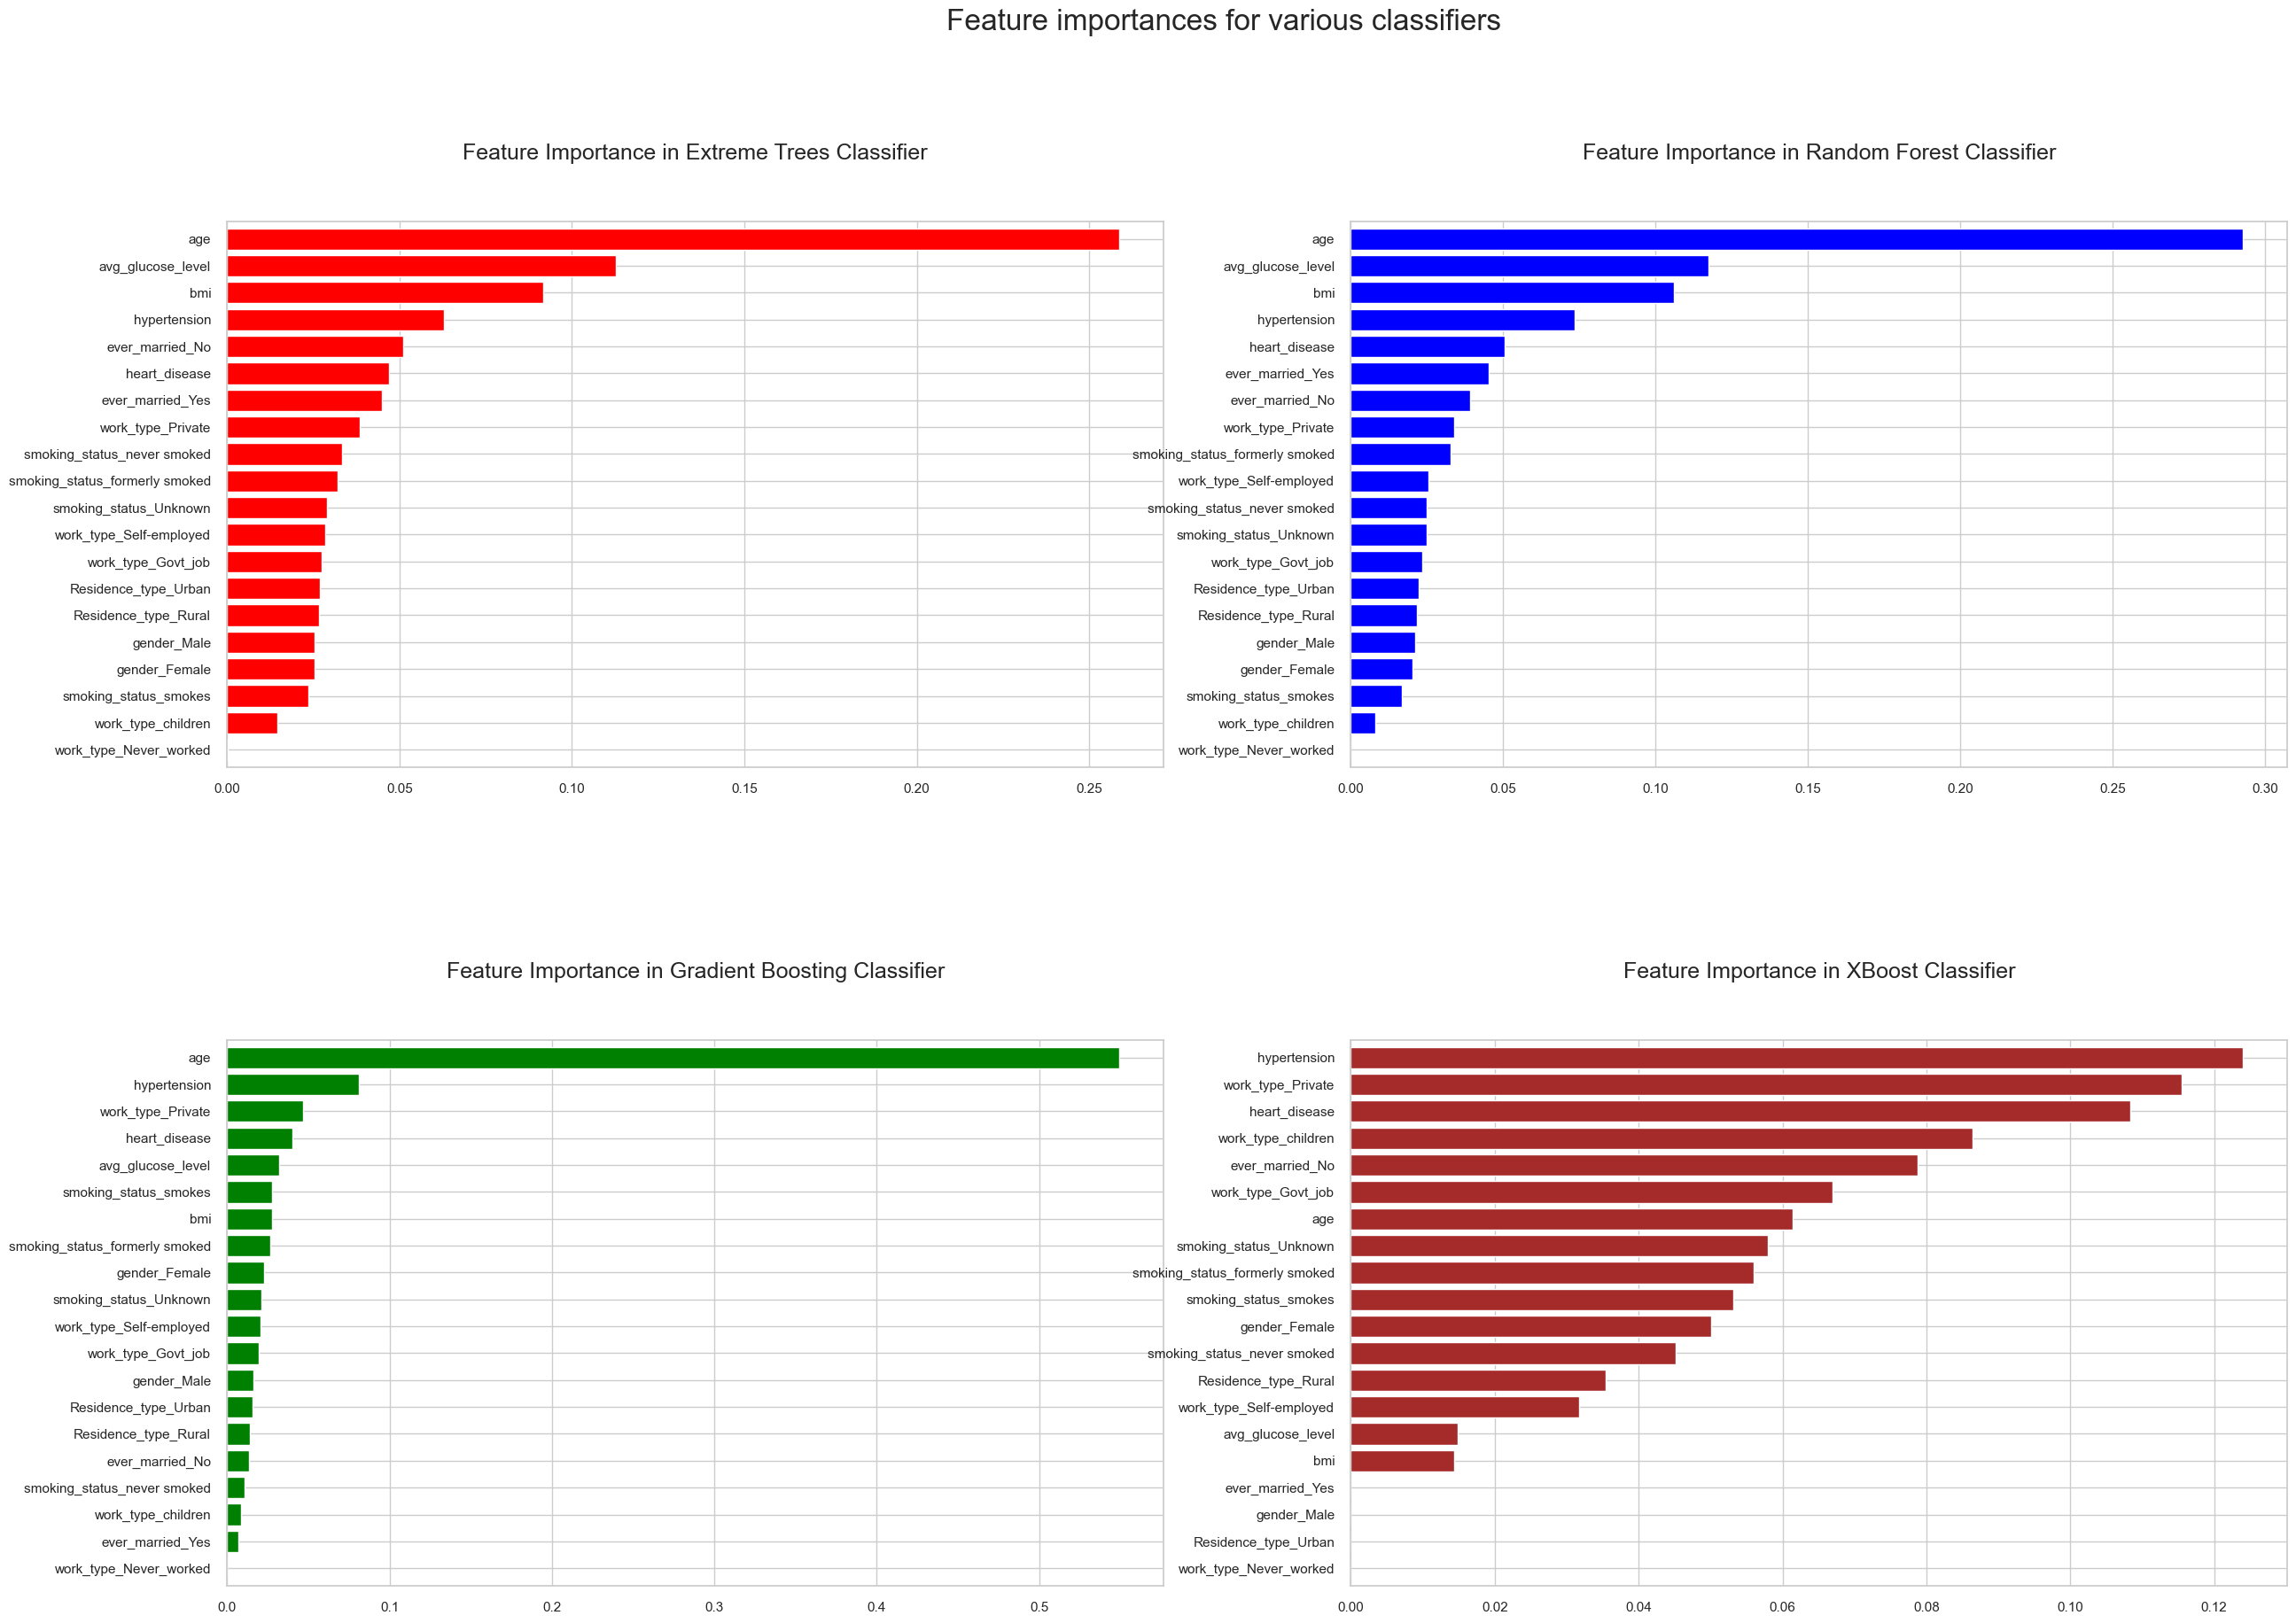

In [391]:
indices = [5, 6, 10,11]
models_new = [models[index] for index in indices]
model_list = ['Extreme Trees Classifier','Random Forest Classifier',
              'Gradient Boosting Classifier','XBoost Classifier']
color_list = ['red','blue','green','brown']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Feature importances for various classifiers", fontsize=24, y=1)

for model, ax in zip(models_new, axs.ravel()):
    pd.Series(model[-1].feature_importances_, index = X_train_resampled.columns).\
    sort_values(ascending=True).plot.barh(width=0.8,ax = ax,color=color_list[models_new.index(model)])
    ax.set_title(f'Feature Importance in {model_list[models_new.index(model)]}', fontsize=18, y=1.1)
    ax.set_xlabel("")

plt.show()

It can be seen that the most important feature variables for different classifiers are 'hypertension', 'age' and 'heart_disease'. These variables were selected for pipelines. 'bmi' and 'avg_glucose_level variables were included because t-tests indicated their significance.

'work_type_children" variable contains the same information as the 'age' variable and'work_type_Never_worked' variable contains only a few 1 values, thus, these variables were excluded.

Some variables who were binary but were encoded twice by one hot encoding were removed ('gender_male', 'ever_married_no', 'Residence_type_No'. 'smoking_status_Unknown' was removed as it does not contain meaningful information by itself.

In [631]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7288 entries, 0 to 7287
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             7288 non-null   float64
 1   avg_glucose_level               7288 non-null   float64
 2   bmi                             7288 non-null   float64
 3   gender_Female                   7288 non-null   float64
 4   gender_Male                     7288 non-null   float64
 5   ever_married_No                 7288 non-null   float64
 6   ever_married_Yes                7288 non-null   float64
 7   work_type_Govt_job              7288 non-null   float64
 8   work_type_Never_worked          7288 non-null   float64
 9   work_type_Private               7288 non-null   float64
 10  work_type_Self-employed         7288 non-null   float64
 11  work_type_children              7288 non-null   float64
 12  Residence_type_Rural            72

In [532]:
X_train_resampled_e2 = X_train_resampled.iloc[:,[0,1,2,3,6,7,9,10,13,15,16,17,18,19]]
X_pipe_test_e2 = X_pipe_test.iloc[:,[0,1,2,3,6,7,9,10,13,15,16,17,18,19]]

In [533]:
X_train_resampled_e2.columns = X_pipe_test_e2.columns = [
      'age', 'avg_glucose_level', 'bmi',
      'gender_Female',
       'ever_married_Yes', 
       'work_type_Govt_job', 
       'work_type_Private', 'work_type_Self-employed',
       'Residence_type_Urban',
       'smoking_status_formerly smoked',
       'smoking_status_never smoked',
       'smoking_status_smokes', 
        'hypertension','heart_disease']

Classifiers were run on this new list of feature variables.

In [615]:
models_ifeatures = []
scores_ifeatures = {}
scores_ifeatures["model_name"] = []
scores_ifeatures["a_score"] = []
scores_ifeatures["f1_score"] = []
scores_ifeatures["predictions"] = []

for classifier in classifiers_full:
    model = classifier.fit(X_train_resampled_e2, y_train_resampled)
    prediction = model.predict(X_pipe_test_e2)
    print (classifier.__class__.__name__)
    f1 = f1_score(y_test, prediction).round(3)
    print("{} F1_score: {}".format(classifier.__class__.__name__, f1))
    acc_sq = accuracy_score(y_test, prediction).round(3)
    print (f'Model accuracy score: {acc_sq}')
    print('')
    scores_ifeatures["model_name"].append(f'{classifier.__class__.__name__}')
    scores_ifeatures["a_score"].append(acc_sq)
    scores_ifeatures["f1_score"].append(f1)
    scores_ifeatures["predictions"].append(prediction)
    models_ifeatures.append(model)

NuSVC
NuSVC F1_score: 0.209
Model accuracy score: 0.716

LinearSVC
LinearSVC F1_score: 0.217
Model accuracy score: 0.741

SGDClassifier
SGDClassifier F1_score: 0.216
Model accuracy score: 0.75

LogisticRegression
LogisticRegression F1_score: 0.222
Model accuracy score: 0.747

BaggingClassifier
BaggingClassifier F1_score: 0.192
Model accuracy score: 0.894

ExtraTreesClassifier
ExtraTreesClassifier F1_score: 0.118
Model accuracy score: 0.918

RandomForestClassifier
RandomForestClassifier F1_score: 0.136
Model accuracy score: 0.92

SVC
SVC F1_score: 0.192
Model accuracy score: 0.803

KNeighborsClassifier
KNeighborsClassifier F1_score: 0.146
Model accuracy score: 0.808

AdaBoostClassifier
AdaBoostClassifier F1_score: 0.197
Model accuracy score: 0.803

GradientBoostingClassifier
GradientBoostingClassifier F1_score: 0.186
Model accuracy score: 0.856

XGBClassifier
XGBClassifier F1_score: 0.219
Model accuracy score: 0.861



In [616]:
joblib.dump(models_ifeatures[11], 'stroke_prediction_app/XgBoost.joblib')

['stroke_prediction_app/XgBoost.joblib']

In [398]:
def objective(trial):
     
    classifier_name = trial.suggest_categorical("classifier", ["XgBoost", "ExtremeTrees" "LogisticRegression","SVC", 
                                                               "RandomForest", "GradientBoosting",
                                                               "KNeighborsClassifier"])
    
    if classifier_name == "XgBoost":
        n_estimators = trial.suggest_int("n_estimators", 10,1001, step = 100)
        max_depth = trial.suggest_int('max_depth', 3, 9, step = 3)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, step = 0.1)
        subsample = trial.suggest_float('subsample', 0.6, 1, step = 0.2)
        classifier_obj = xg.XGBClassifier(n_estimators = n_estimators, max_depth = max_depth,
                                           learning_rate = learning_rate, subsample = subsample)
        classifier_obj.fit(X_train_resampled_e2, y_train_resampled)
   
    elif classifier_name == "ExtremeTrees":
        n_estimators = trial.suggest_int("n_estimators", 100,500, step = 200)
        max_depth = trial.suggest_int('max_depth',0, 10, step = 5)
        max_features = trial.suggest_categorical("max_features", ['auto','sqrt','log2'])
        classifier_obj = ExtraTreesClassifier(n_estimators = n_estimators, max_depth = max_depth,
                                           max_features = max_features)
        classifier_obj.fit(X_train_resampled_e2, y_train_resampled)
        
    elif classifier_name == "LogisticRegression":
        lg_penalty = trial.suggest_categorical("lg_penalty", ['l1', 'l2'])
        lg_c = trial.suggest_float('C', 0.1, 10.0)
        classifier_obj = LogisticRegression(penalty = lg_penalty, C=lg_c, solver="liblinear")
        classifier_obj.fit(X_train_resampled_e2, y_train_resampled)
        
    elif classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 0.1, 1000, log =True)
        gamma = trial.suggest_float("gamma", 0.1, 1000, log=True)
        classifier_obj = SVC(class_weight = "balanced", C=svc_c, gamma=gamma, kernel='rbf')
        classifier_obj.fit(X_train_resampled_e2, y_train_resampled)
        
    elif classifier_name == "RandomForest":
        max_features = trial.suggest_int("max_features", 6,32, step = 5)
        n_estimators = trial.suggest_int("n_estimators", 10,101, step = 10)
        max_depth = trial.suggest_int("rf_max_depth", 2, 64, log=True)
        max_samples = trial.suggest_float("max_samples",0.2, 1)
        classifier_obj = RandomForestClassifier(
            max_depth = max_depth,
            max_features = max_features,
            n_estimators = n_estimators,
            max_samples = max_samples,
            random_state = 42)
        classifier_obj.fit(X_train_resampled_e2, y_train_resampled)
        
    elif classifier_name == "GradientBoosting":
        max_features_gr = trial.suggest_int("max_features_gr", 6,32, step = 5)
        n_estimators_gr = trial.suggest_int("n_estimators_gr", 10,101, step = 10)
        max_depth_gr = trial.suggest_int("rf_max_depth_gr", 2, 64, log=True)
        classifier_obj = GradientBoostingClassifier(
            max_depth = max_depth_gr,
            max_features = max_features_gr,
            n_estimators = n_estimators_gr,
            random_state = 42)
        classifier_obj.fit(X_train_resampled_e2, y_train_resampled)
        
    else:
        n_neighbors = trial.suggest_int("n_neighbors", 3,13, step = 2)
        weights = trial.suggest_categorical("weights",['uniform', 'distance'])
        p = trial.suggest_int("p",1,2)
        classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p = p)
        classifier_obj.fit(X_train_resampled_e2, y_train_resampled)
    
    y_pred = classifier_obj.predict(X_pipe_test_e2)
    score = accuracy_score(y_test, y_pred)

    return score

In [399]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

Best Score:  0.9514866979655712
Best Params: 
  classifier: SVC
  svc_c: 85.13247224925769
  gamma: 672.1371201184038


The Optuna solution after feature selection based on feature importances suggested support vactor machines (SVC) classifier with certain parameters as the one which generates the highest accuracy score (0.951). 

It can be observed that classifiers with combinations of feature variables based on feature importances do not generate better predictions - both without hyperparameter tuning and with Optima hyperparameter tuning. Thus it can be concluded that the initial set of features is the most optimal because it generates the best predictions of stroke.

#### Shap feature selection:

Another approach to feature selection is by using shap values which indicate feature importances as it is provided by the shap library.

In [440]:
indices = [5, 6, 10,11]
shap_values_list = []
models_new = [models_ifeatures[index] for index in indices]
model_list = ['Extreme Trees Classifier','Random Forest Classifier',
              'Gradient Boosting Classifier','XBoost Classifier']

for i in range(4):
    explainer = shap.TreeExplainer(models_new[i])
    shap_values = explainer.shap_values(X_pipe_test_e2)
    shap_values_list.append(shap_values)



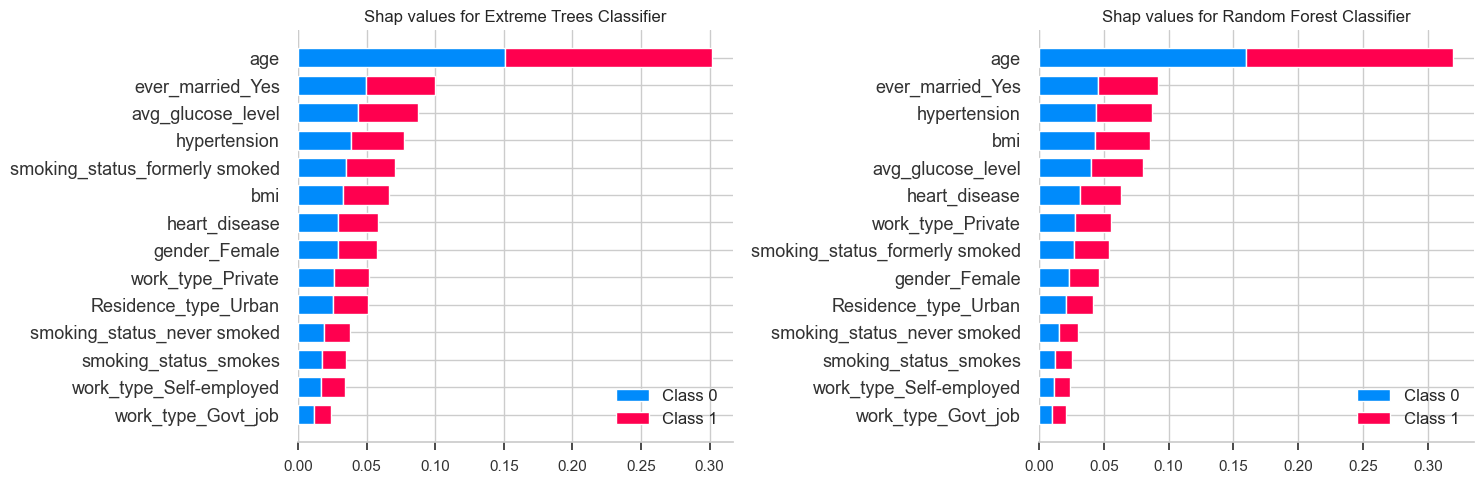

In [442]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
shap.summary_plot(shap_values_list[0], features = X_pipe_test_e2, 
                     feature_names=X_pipe_test_e2.columns, plot_size=None, show=False)
plt.title(f"Shap values for {model_list[0]}", fontsize = 12)
plt.xlabel('')
plt.ylabel('')
plt.subplot(1,2,2)
shap.summary_plot(shap_values_list[1], features = X_pipe_test_e2, 
                     feature_names=X_pipe_test_e2.columns, plot_size=None, show=False)
plt.title(f"Shap values for {model_list[1]}", fontsize = 12)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

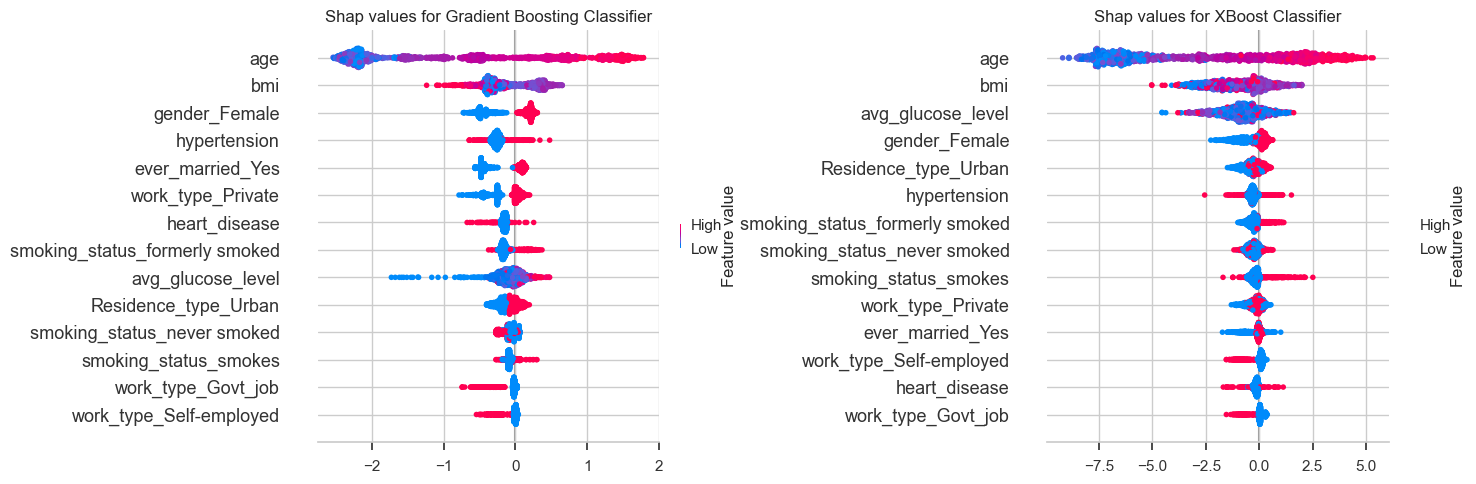

In [443]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
shap.summary_plot(shap_values_list[2], features = X_pipe_test_e2, 
                     feature_names=X_pipe_test_e2.columns, plot_size=None, show=False)
plt.title(f"Shap values for {model_list[2]}", fontsize = 12)
plt.xlabel('')
plt.ylabel('')
plt.subplot(1,2,2)
shap.summary_plot(shap_values_list[3], features = X_pipe_test_e2, 
                     feature_names=X_pipe_test_e2.columns, plot_size=None, show=False)
plt.title(f"Shap values for {model_list[3]}", fontsize = 12)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

It can be observed that shap values for ensemble classifiers are similar to feature importances. However, it also can be seen that numerical variables 'age','bmi' and 'avg_glucose_level' have higher shap values comparing to features importances. Also such variables as 'gender_Female', 'ever_married_Yes' were included as they have quite high shap values.

In [449]:
X_train_resampled_e3 = X_train_resampled.iloc[:,[0,1,2,3,4,12,13]]
X_pipe_test_e3 = X_pipe_test.iloc[:,[0,1,2,3,4,12,13]]

In [450]:
scores_shapfeatures = {}
scores_shapfeatures["model_name"] = []
scores_shapfeatures["a_score"] = []
scores_shapfeatures["f1_score"] = []
scores_shapfeatures["predictions"] = []

for classifier in classifiers_full:
    model = classifier.fit(X_train_resampled_e3, y_train_resampled)
    prediction = model.predict(X_pipe_test_e3)
    print (classifier.__class__.__name__)
    f1 = f1_score(y_test, prediction).round(3)
    print("{} F1_score: {}".format(classifier.__class__.__name__, f1))
    acc_sq = accuracy_score(y_test, prediction).round(3)
    print (f'Model accuracy score: {acc_sq}')
    print('')
    scores_shapfeatures["model_name"].append(f'{classifier.__class__.__name__}')
    scores_shapfeatures["a_score"].append(acc_sq)
    scores_shapfeatures["f1_score"].append(f1)
    scores_shapfeatures["predictions"].append(prediction)

NuSVC
NuSVC F1_score: 0.2
Model accuracy score: 0.705

LinearSVC
LinearSVC F1_score: 0.208
Model accuracy score: 0.719

SGDClassifier
SGDClassifier F1_score: 0.208
Model accuracy score: 0.721

LogisticRegression
LogisticRegression F1_score: 0.213
Model accuracy score: 0.735

BaggingClassifier
BaggingClassifier F1_score: 0.205
Model accuracy score: 0.794

ExtraTreesClassifier
ExtraTreesClassifier F1_score: 0.175
Model accuracy score: 0.838

RandomForestClassifier
RandomForestClassifier F1_score: 0.152
Model accuracy score: 0.825

SVC
SVC F1_score: 0.209
Model accuracy score: 0.733

KNeighborsClassifier
KNeighborsClassifier F1_score: 0.201
Model accuracy score: 0.788

AdaBoostClassifier
AdaBoostClassifier F1_score: 0.216
Model accuracy score: 0.732

GradientBoostingClassifier
GradientBoostingClassifier F1_score: 0.219
Model accuracy score: 0.732

XGBClassifier
XGBClassifier F1_score: 0.179
Model accuracy score: 0.598



However, after running classifiers on the combination of these feature variables, it was found that accuracy scores for all classifiers are lower.

### Comparison of classifiers with and withouth hyperparameter tuning and feature selection

Finally, accuracy scores generated from different classifiers (except the Optuna solution) are compared by concating the accuracy scores into a single dataframe and plotting them.

In [ ]:
scores_rand = pd.DataFrame(scores_rand).set_index('model_name')
scores_rfeatures = pd.DataFrame(scores_rfeatures).set_index('model_name')
scores_ifeatures = pd.DataFrame(scores_ifeatures).set_index('model_name')
scores_shapfeatures = pd.DataFrame(scores_shapfeatures).set_index('model_name')

In [460]:
ascores_full = pd.concat([scores.loc[:,'a_score'],scores_rand.loc[:,'a_score'], scores_rfeatures.loc[:,'a_score'],
                          scores_ifeatures.loc[:,'a_score'], scores_shapfeatures.loc[:,'a_score']], axis=1)

ascores_full.columns =['a_score_full','a_score_rand','a_score_rfeatures',
                       'a_score_ifeatures','a_score_shapfeatures']


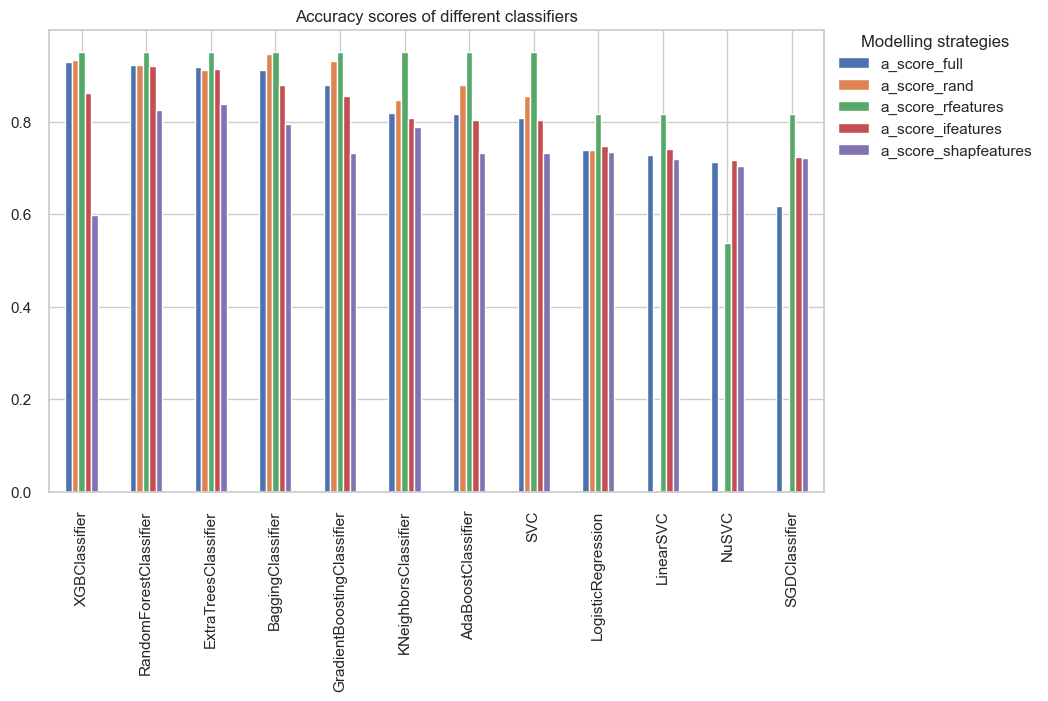

In [461]:
sns.set(style='whitegrid')
ascores_full.plot(kind='bar', figsize=(10, 6))
plt.title('Accuracy scores of different classifiers')
plt.xticks(rotation=90)
plt.legend(title='Modelling strategies', bbox_to_anchor=(1, 1.02),
                     loc='upper left')  
plt.xlabel('')
plt.ylabel('')
plt.show()

It can be observed that for all approaches the XgBoost Classifier and RandomForest classifier generate the highest accuracy scores (aprroximately 0.93 and 0.92) and they do not differ much depending on the modelling approach (either with default parameters with all features or after feature selection and hyperparameter tuning). However, for other classifiers hyperparameter tuning and feature selection has some effect on accuracy scores.

## Using machine learning models for prediction

The machine learning model which was trained and tested on the data in the 'stroke' dataset could be used for predicting probability that a person will experience a stroke based on input values that he or she provides. Bellow the code is provided for getting input values, adding them as a row to the test dataset, preprocessing the data,  predicting probability values on the pretrained model.

In [509]:
inp1 = str(input("What is your gender?: "))
inp2 = int(input("What is your age?: "))
inp3 = int(input("Have you ever had a hypertension?: "))
inp4 = int(input("Have you ever had a heart disease?: "))
inp5 = str(input("Have you ever been married?: "))
inp6 = str(input("What is your work type?: "))
inp7 = str(input("What is your residence type?: "))
inp8 = int(input("What is your average glucose level?: "))
inp9 = int(input("What is your BMI: "))
inp10 = str(input("What is your smoking status?: "))



What is your gender?:Male
What is your age?:50
Have you ever had a hypertension?:1
Have you ever had a heart disease?:1
Have you ever been married?:Yes
What is your work type?:Private
What is your residence type?:Urban
What is your average glucose level?:104
What is your BMI:27
What is your smoking status?:never smoked


In [510]:
X_prediction = X_test.copy()

In [511]:
X_prediction.loc[len(X_prediction.index)] = [inp1, inp2, inp3, inp4, inp5, inp6, inp7, inp8, inp9, inp10] 


In [513]:
X_pipe_prediction = pd.DataFrame(preprocessor.fit_transform(X_prediction))


In [519]:
X_pipe_prediction.columns = ['age', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked',
       'smoking_status_never smoked',
       'smoking_status_smokes', 'hypertension',
       'heart_disease']

In [521]:
X_pipe_prediction_e2 = X_pipe_prediction.iloc[:,[0,1,2,3,6,7,9,10,13,15,16,17,18,19]]

In [549]:
prob = models_ifeatures[11].predict_proba(pd.DataFrame(X_pipe_prediction_e2.iloc[-1,:]).transpose())

print(f' Probability that you will experience a stroke is :{prob[0][1].round(3)}')

 Probability that you will experience a stroke is :0.0


In [540]:
explainer = shap.TreeExplainer(models_ifeatures[10])
shap_values = explainer.shap_values(X_pipe_prediction_e2)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1278], pd.DataFrame(X_pipe_prediction_e2.iloc[-1,:]).transpose())

## Conclusions

The following conclusions can be made from the results of data analysis of the Stroke Prediction dataset:

1. Persons 
- of older age, 
- having higher BMI's, 
- having higher glucose levels in blood, 
- who have had a hypertension,
- who have had a hear disease

more likely will experience a stroke event (the differences are statistically significant).
  
2. The classifiers which the best predict the probability of stroke event are ensemble classifiers: the XgBoost classifier (accuracy score - 0.93), the Random Forest classifier (accuracy score - 0.92), Gradient Boosting classifier (accuracy score - 0.88), Extreme Trees classifier (accuracy score - 0.918).
3. It could be recommended for persons who do not want to experience a stroke event to pay attention to their weight and glucose level in blood and control their blood pressure.


#### Limitations:

- Hyperparameter tuning was not performed for possible parameters and classifiers due to time limitation.
- Random search of features was performed only for the Logistic Regression classifier.

#### Suggestions for improvement:

- To perform analysis which is mentioned as limitations. 

## References

Stroke Prediction Data, https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset